## Introduction

### Machine learning model to classify the credit score based on people bank details and credit related information.

### Import the necessary packages.

In [ ]:
!pip install -q klib

     |████████████████████████████████| 133 kB 5.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
import klib
import re
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
import nltk
import math
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/HE_transunion-data-science-analytics-hiring-challenge/dataset/train.csv")
test=pd.read_csv("/content/gdrive/MyDrive/HE_transunion-data-science-analytics-hiring-challenge/dataset/test.csv")

In [ ]:
train.rename(columns={col:col.lower() for col in train.columns},inplace=True)
test.rename(columns={col:col.lower() for col in test.columns},inplace=True)

### Structure of the train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      90015 non-null   object 
 4   age                       100000 non-null  object 
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  object 
 8   monthly_inhand_salary     84998 non-null   float64
 9   num_bank_accounts         100000 non-null  int64  
 10  num_credit_card           100000 non-null  int64  
 11  interest_rate             100000 non-null  int64  
 12  num_of_loan               100000 non-null  object 
 13  type_of_loan              88592 non-null   ob

#### The above information shows that there are 100000 data entries and 28 columns.
#### The target columns is **credit score**.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        50000 non-null  object 
 1   customer_id               50000 non-null  object 
 2   month                     50000 non-null  object 
 3   name                      44985 non-null  object 
 4   age                       50000 non-null  object 
 5   ssn                       50000 non-null  object 
 6   occupation                50000 non-null  object 
 7   annual_income             50000 non-null  object 
 8   monthly_inhand_salary     42502 non-null  float64
 9   num_bank_accounts         50000 non-null  int64  
 10  num_credit_card           50000 non-null  int64  
 11  interest_rate             50000 non-null  int64  
 12  num_of_loan               50000 non-null  object 
 13  type_of_loan              44296 non-null  object 
 14  delay_

#### The above information shows that there are 50000 data entries and 27 columns.

### Let's see is there any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

id                              0
customer_id                     0
month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit            0
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              1200
credit_score                    0
dtype: int64

In [ ]:
train.columns[train.isnull().any()]

Index(['name', 'monthly_inhand_salary', 'type_of_loan',
       'num_of_delayed_payment', 'num_credit_inquiries', 'credit_history_age',
       'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

#### The above information shows that there are missing values in name, monthly_inhand_salary, type_of_loan, num_of_delayed_payment, num_credit_inquiries, credit_history_age,amount_invested_monthly, monthly_balance columns.

In [ ]:
test.isnull().sum()

id                             0
customer_id                    0
month                          0
name                        5015
age                            0
ssn                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       7498
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
type_of_loan                5704
delay_from_due_date            0
num_of_delayed_payment      3498
changed_credit_limit           0
num_credit_inquiries        1035
credit_mix                     0
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          4470
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly     2271
payment_behaviour              0
monthly_balance              562
dtype: int64

In [ ]:
test.columns[test.isnull().any()]

Index(['name', 'monthly_inhand_salary', 'type_of_loan',
       'num_of_delayed_payment', 'num_credit_inquiries', 'credit_history_age',
       'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

#### The above information shows that there are missing values in name, monthly_inhand_salary, type_of_loan, num_of_delayed_payment, num_credit_inquiries, credit_history_age,amount_invested_monthly, monthly_balance columns.

### Let's see the glimpse of train dataset

In [ ]:
data_table.DataTable(train.head(),max_columns=50)

### Let's create a function to display the catgeorical column level counts.

In [ ]:
def count_plot(df,col,rot=None,switchax=None,size=(8,6),title=''):
  _=plt.figure(figsize=size)
  if switchax:
     _=sns.countplot(y=df[col],order=df[col].value_counts().index);
     _=plt.title(title,fontsize=25)
     _=plt.ylabel(col,fontsize=20)
     _=plt.yticks(fontsize=14,rotation=rot)   
  
  else:
     _=sns.countplot(x=df[col],order=df[col].value_counts().index);
     _=plt.title(title,fontsize=25)
     _=plt.xlabel(col,fontsize=20)
     _=plt.xticks(fontsize=14,rotation=rot)   
  

### Let's create a function to display the group by catgeorical column level counts.

In [ ]:
def grp_count_plot(df,col,grp,rot=None,switchax=None,size=(10,8),title=''):
  _=plt.figure(figsize=size)
  if switchax:
    g=sns.countplot(y=df[col],hue=df[grp],order=df[col].value_counts().index );
    g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    _=plt.title(title,fontsize=25)
    _=plt.ylabel(col.capitalize(),fontsize=20)
    _=plt.yticks(fontsize=14,rotation=rot)
  else:
    g=sns.countplot(x=df[col],hue=df[grp],order=df[col].value_counts().index );
    g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    _=plt.title(title,fontsize=25)
    _=plt.xlabel(col.capitalize(),fontsize=20)
    _=plt.xticks(fontsize=14,rotation=rot)

 

### Let's create a function for box plot.

In [ ]:
def box_plot(df,col,rot=None):
  _=plt.figure(figsize=(8,6))
  _=sns.boxplot(y=df[col])
  _=plt.title(col.capitalize()+" Distribution",fontsize=25)
  _=plt.ylabel(col,fontsize=20,rotation=rot)
  _=plt.yticks(fontsize=14)


### Let's create a function for side by side plot(density and group-wise boxplot).

In [ ]:
def side_by_side_plot(df,grp,valcol,rot=None):
  clr="tab10"
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
  fig.tight_layout()
  sns.kdeplot(x=df[valcol], hue=df[grp],ax=ax1,palette=clr)
  ax1.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
  ax1.set_xlabel(valcol,fontsize=20)
  sns.boxplot(x=df[grp],y=df[valcol],ax=ax2)
  ax2.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
  ax2.set_xlabel(grp,fontsize=20)
  ax2.tick_params(rotation=rot)

### Let's create a function for group by numerical summary.

In [ ]:
def group_summary(df,groupcol,value):
    return df.groupby(groupcol)[value].describe().reset_index().sort_values('mean',ascending=False)

In [ ]:
def group_by_perc(df,grp,target):
  return df.groupby([grp,target])[target].agg({'count'}).reset_index().assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).sort_values('percentage',ascending=False)

### Let's explore the target column(**buy**) distribution.The target column describes user's intent to buy the product on the website.

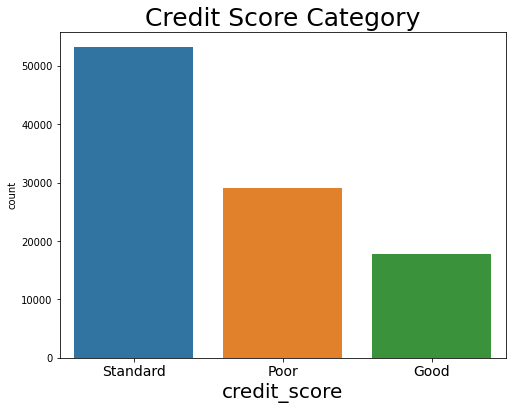

In [ ]:
count_plot(train,'credit_score',title="Credit Score Category")

#### The above bar plot explains that the target column is imbalanced.

#### Let's see how many unique customers information are there and see how they are classified under different credit score category.

In [ ]:
train['customer_id'].nunique()

12500

#### There are 12500 unique customer IDs in the train data. Each id has 8 records. In the 8 records, the credit score is classified as either poor, standard, or good. 

#### Some customers(30) have been classified under all types of credit score over the period of time, based on their bank and credit information..

In [ ]:
train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==3')

customer_id  count
45     CUS_0x10c5      3
369    CUS_0x1600      3
544    CUS_0x18ef      3
895    CUS_0x1edd      3
1325   CUS_0x2594      3
1428   CUS_0x2719      3
2346   CUS_0x3507      3
3583   CUS_0x472e      3
3902   CUS_0x4bda      3
4013   CUS_0x4d48      3
4509   CUS_0x5451      3
5464   CUS_0x6257      3
5839   CUS_0x67bb      3
6162   CUS_0x6c5c      3
6500   CUS_0x7136      3
6558   CUS_0x721f      3
6597   CUS_0x72bc      3
6710   CUS_0x748d      3
6732   CUS_0x74f5      3
6925   CUS_0x77fe      3
6965   CUS_0x788b      3
7114   CUS_0x7aa9      3
7781   CUS_0x84d1      3
8454   CUS_0x8e80      3
9812   CUS_0xa29a      3
10276   CUS_0xa9a      3
10333  CUS_0xaa85      3
10872  CUS_0xb226      3
11576  CUS_0xbc6a      3
11854  CUS_0xc09f      3

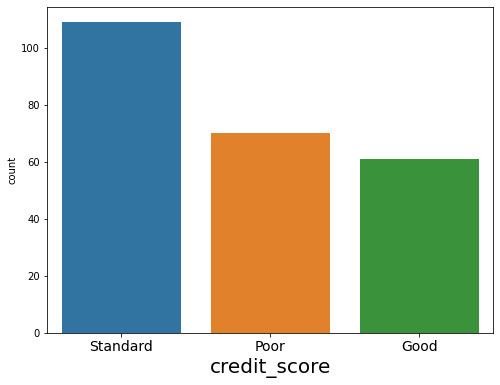

In [ ]:
count_plot(train[train['customer_id'].isin(train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==3')['customer_id'].values)],
           'credit_score')

In [ ]:
train[train['customer_id'].isin(train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==3')['customer_id'].values)]['credit_score'].value_counts()

Standard    109
Poor         70
Good         61
Name: credit_score, dtype: int64

#### Some customers(7262) have been classified under 2 categories of credit score over the period of time, based on their bank and credit information.


In [ ]:
train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==2')

customer_id  count
0      CUS_0x1000      2
2      CUS_0x100b      2
5      CUS_0x1015      2
9      CUS_0x102e      2
12     CUS_0x1038      2
...           ...    ...
12494   CUS_0xfea      2
12495   CUS_0xff3      2
12497   CUS_0xff6      2
12498   CUS_0xffc      2
12499   CUS_0xffd      2

[7262 rows x 2 columns]

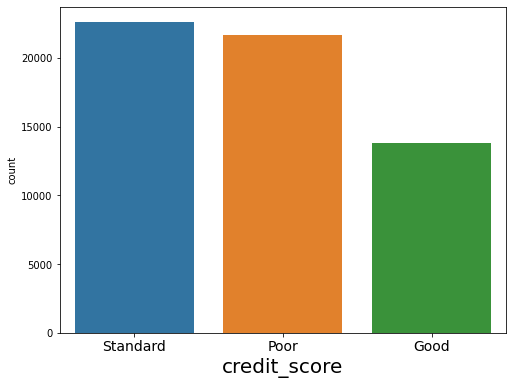

In [ ]:
count_plot(train[train['customer_id'].isin(train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==2')['customer_id'].values)],
           'credit_score')

In [ ]:
train[train['customer_id'].isin(train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==2')['customer_id'].values)]['credit_score'].value_counts()

Standard    22601
Poor        21688
Good        13807
Name: credit_score, dtype: int64

#### Some customers(5208) have the same credit score over the period of time, based on their bank and credit information.

In [ ]:
train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==1')

customer_id  count
1      CUS_0x1009      1
3      CUS_0x1011      1
4      CUS_0x1013      1
6      CUS_0x1018      1
7      CUS_0x1026      1
...           ...    ...
12490   CUS_0xfdf      1
12491   CUS_0xfe3      1
12492   CUS_0xfe4      1
12493   CUS_0xfe5      1
12496   CUS_0xff4      1

[5208 rows x 2 columns]

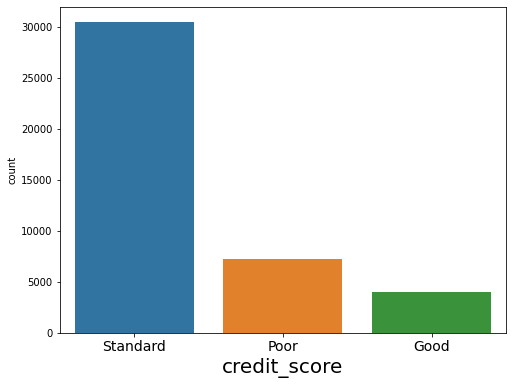

In [ ]:
count_plot(train[train['customer_id'].isin(train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==1')['customer_id'].values)],
           'credit_score')

In [ ]:
train[train['customer_id'].isin(train.groupby(['customer_id','credit_score'])['credit_score'].agg({'count'}).reset_index().groupby(['customer_id'])['credit_score'].agg({'count'}).reset_index().query('count==1')['customer_id'].values)]['credit_score'].value_counts()

Standard    30464
Poor         7240
Good         3960
Name: credit_score, dtype: int64

### Let's see month wise credit score distribution.

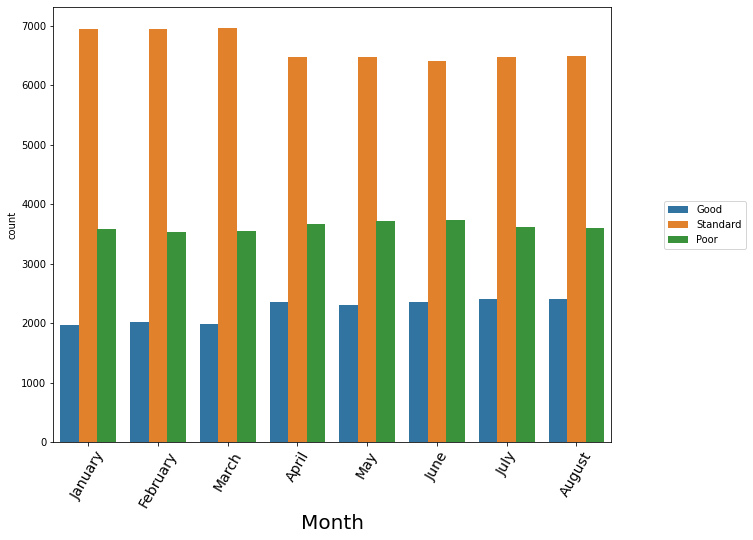

In [ ]:
grp_count_plot(train,'month','credit_score',rot=60)

In [ ]:
group_by_perc(train,'month','credit_score')

month credit_score  count  percentage
20     March     Standard   6965        6.96
8   February     Standard   6945        6.94
11   January     Standard   6943        6.94
23       May     Standard   6478        6.48
5     August     Standard   6485        6.48
14      July     Standard   6475        6.48
2      April     Standard   6473        6.47
17      June     Standard   6410        6.41
16      June         Poor   3728        3.73
22       May         Poor   3712        3.71
1      April         Poor   3670        3.67
13      July         Poor   3614        3.61
4     August         Poor   3602        3.60
10   January         Poor   3582        3.58
19     March         Poor   3551        3.55
7   February         Poor   3539        3.54
12      July         Good   2411        2.41
3     August         Good   2413        2.41
15      June         Good   2362        2.36
0      April         Good   2357        2.36
21       May         Good   2310        2.31
6   February         Good   2016        2.02
18     March         Good   1984        1.98
9    January         Good   1975        1.98

#### The above plot explains that in all the months most of the customers are classified under the standard credit score category.

### Let's see customer's age distribution.

### The age column has mixed data type values. So let's extract the numerical value in the column and convert it to a numeric data type.

In [ ]:
train['age'].str.extract("([^0-9]+)").value_counts()

_    4939
-     886
dtype: int64

In [ ]:
train['age'].str.contains("([^0-9]+)").value_counts()

False    94175
True      5825
Name: age, dtype: int64

In [ ]:
train['age']=train['age'].apply(lambda x: re.sub("([\_\-])","",str(x)))

In [ ]:
train['age']=train['age'].astype('int')

### The age column numerical summary shows that the maximum value is 8698. It's totally a data entry error.

In [ ]:
train['age'].describe()

count    100000.000000
mean        119.509700
std         684.757313
min          14.000000
25%          25.000000
50%          34.000000
75%          42.000000
max        8698.000000
Name: age, dtype: float64

### Let's filter out the age column values by less than 100 years old and see the distribution.

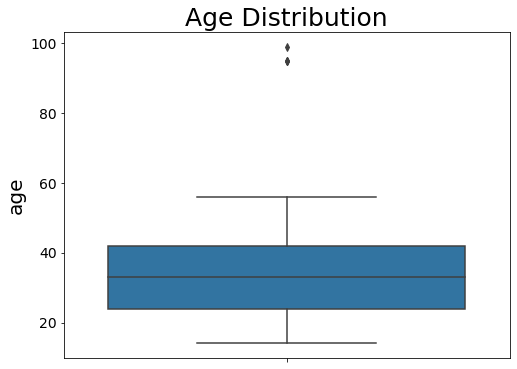

In [ ]:
box_plot(train[train['age']<100],'age',rot=90)

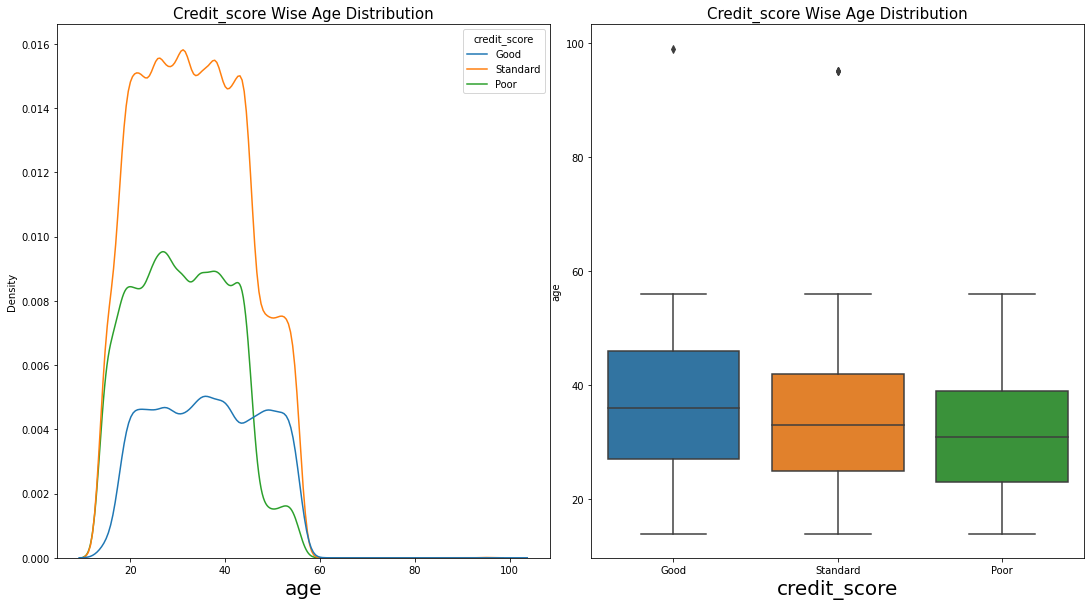

In [ ]:
side_by_side_plot(train[train['age']<100],'credit_score','age')

In [ ]:
group_summary(train[train['age']<100],'credit_score','age')

credit_score    count       mean        std   min   25%   50%   75%   max
0         Good  17295.0  36.402833  11.128788  14.0  27.0  36.0  46.0  99.0
2     Standard  51723.0  33.448369  10.813689  14.0  25.0  33.0  42.0  95.0
1         Poor  28205.0  31.203155   9.981141  14.0  23.0  31.0  39.0  56.0

#### After filtering the high value in the age column, the column looks normally distributed.

#### The density and group by boxplot explain that there is a difference between the mean and credit score category.

### SSN column has mixed data type values.Let's check how many rows have mixed datatypes.

In [ ]:
def ssn_check(ssn):
  if re.match("([0-9]{3}-[0-9]{2}-[0-9]{4})",ssn):
    return True
  else:
    return False  

In [ ]:
train['ssn_check']=train['ssn'].apply(lambda x:ssn_check(x))

In [ ]:
train['ssn_check'].value_counts()

True     94428
False     5572
Name: ssn_check, dtype: int64

#### The above information shows that there are 5572 rows that have mixed data type values. Due to the mixed data types and data entry error some user has more than one SSN.

In [ ]:
train.groupby(['customer_id','ssn'])['ssn'].agg({'count'}).reset_index().groupby('customer_id')['ssn'].agg({'count'})['count'].value_counts()

1    7885
2    4615
Name: count, dtype: int64

#### There are 4615 customers who have more than one SSN.

### SSN has three set of digits. The three parts are,
* area number (first set of 3 digits)
* group number (second set of 2 digits)
* serial number (third set of 4 digits)

### Let's see if there is any difference between customers' credit scores and customers' occupations.

In [ ]:
train['occupation'].nunique()

16

### Some customers have more than one occupation based on their bank and credit information.

In [ ]:
train.groupby(['customer_id','occupation'])['occupation'].agg({'count'}).reset_index().groupby('customer_id')['occupation'].agg({'count'})['count'].value_counts()

1    6950
2    5550
Name: count, dtype: int64

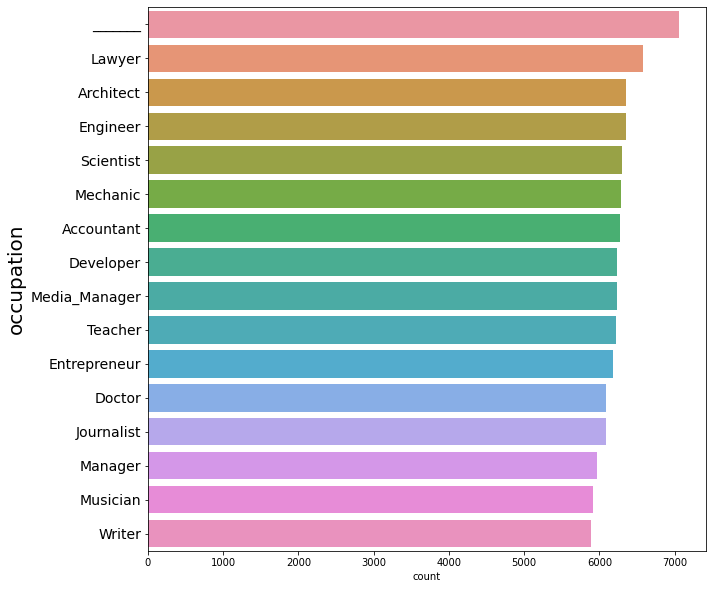

In [ ]:
count_plot(train,'occupation',switchax=True,size=(10,10))

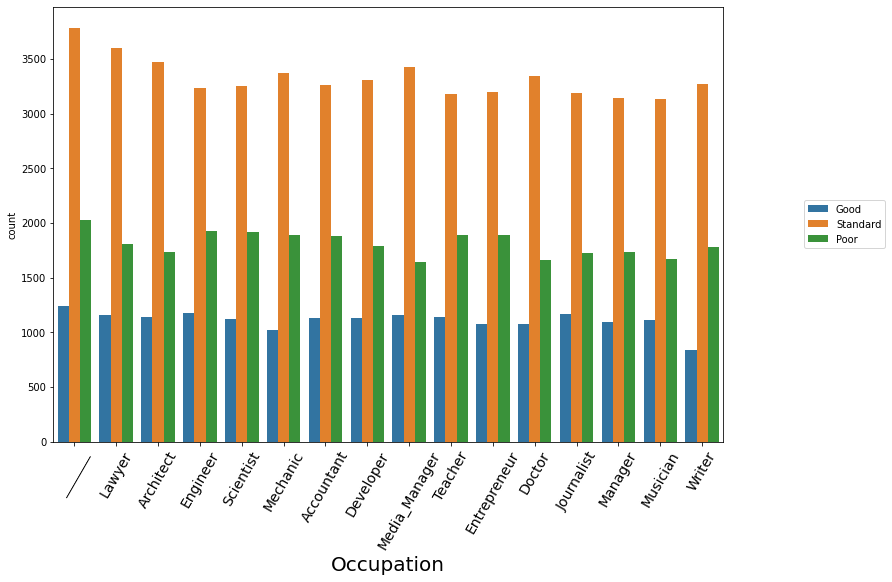

In [ ]:
grp_count_plot(train,'occupation','credit_score',rot=60,size=(12,8))

In [ ]:
group_by_perc(train,'occupation','credit_score')

occupation credit_score  count  percentage
47        _______     Standard   3788        3.79
23         Lawyer     Standard   3603        3.60
5       Architect     Standard   3477        3.48
32  Media_Manager     Standard   3426        3.43
29       Mechanic     Standard   3371        3.37
11         Doctor     Standard   3344        3.34
8       Developer     Standard   3309        3.31
44         Writer     Standard   3269        3.27
2      Accountant     Standard   3264        3.26
38      Scientist     Standard   3251        3.25
14       Engineer     Standard   3236        3.24
17   Entrepreneur     Standard   3198        3.20
20     Journalist     Standard   3187        3.19
41        Teacher     Standard   3177        3.18
26        Manager     Standard   3143        3.14
35       Musician     Standard   3131        3.13
46        _______         Poor   2031        2.03
13       Engineer         Poor   1932        1.93
37      Scientist         Poor   1921        1.92
16   Entrepreneur         Poor   1896        1.90
40        Teacher         Poor   1895        1.90
28       Mechanic         Poor   1896        1.90
1      Accountant         Poor   1879        1.88
22         Lawyer         Poor   1810        1.81
7       Developer         Poor   1792        1.79
43         Writer         Poor   1779        1.78
4       Architect         Poor   1734        1.73
25        Manager         Poor   1732        1.73
19     Journalist         Poor   1725        1.72
34       Musician         Poor   1670        1.67
10         Doctor         Poor   1661        1.66
31  Media_Manager         Poor   1645        1.64
45        _______         Good   1243        1.24
12       Engineer         Good   1182        1.18
18     Journalist         Good   1173        1.17
30  Media_Manager         Good   1161        1.16
21         Lawyer         Good   1162        1.16
3       Architect         Good   1144        1.14
39        Teacher         Good   1143        1.14
0      Accountant         Good   1128        1.13
36      Scientist         Good   1127        1.13
6       Developer         Good   1134        1.13
33       Musician         Good   1110        1.11
24        Manager         Good   1098        1.10
15   Entrepreneur         Good   1080        1.08
9          Doctor         Good   1082        1.08
27       Mechanic         Good   1024        1.02
42         Writer         Good    837        0.84

### Let's see the customer's annual income distribution and see is there any relationship between the income and credit score.

### annual income column has so many non-numeric values. Let's replace those and convert the column to float data type.

In [ ]:
train['annual_income']=train['annual_income'].apply(lambda x: re.sub('[a-z|A-Z\_:, /\n]','',str(x)))

In [ ]:
train['annual_income']=train['annual_income'].astype('float')

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


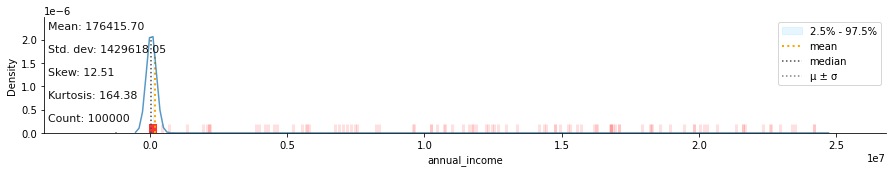

In [ ]:
klib.dist_plot(train['annual_income'])

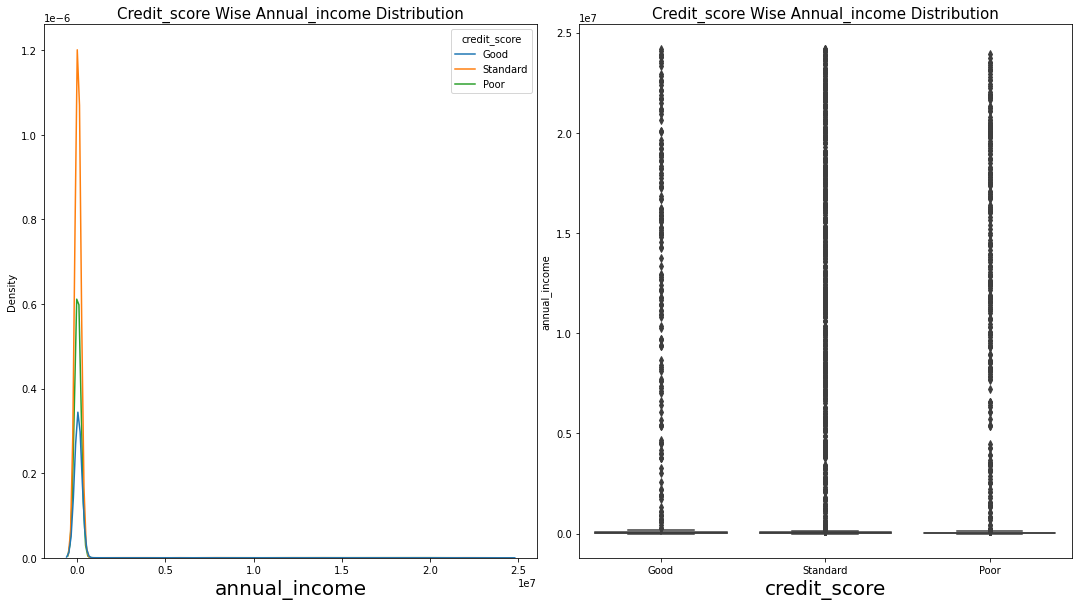

In [ ]:
side_by_side_plot(train,'credit_score','annual_income')

In [ ]:
group_summary(train,'credit_score','annual_income')

credit_score    count           mean           std       min        25%  \
2     Standard  53174.0  185249.156458  1.468144e+06  7006.035  20078.470   
0         Good  17828.0  184936.589810  1.409983e+06  7189.540  29892.370   
1         Poor  28998.0  154979.031698  1.368526e+06  7005.930  16857.295   

        50%       75%         max  
2  37201.06  73910.61  24188807.0  
0  45536.43  98967.87  24198062.0  
1  32276.42  58367.36  23912939.0

#### The customer's annual income column looks normally distributed.

#### The above plot and summary explain that there is difference between the annual income mean and the credit score category.

### Let's see customers in-hand monthly salary distribution and is there any difference between monthly salary and credit score.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


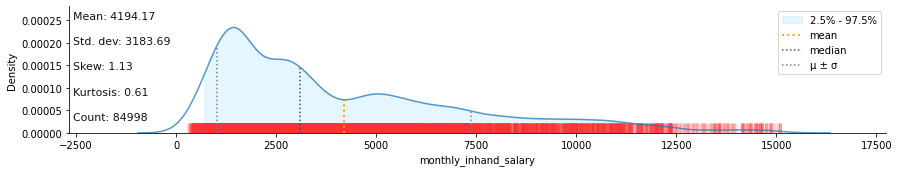

In [ ]:
klib.dist_plot(train['monthly_inhand_salary'])

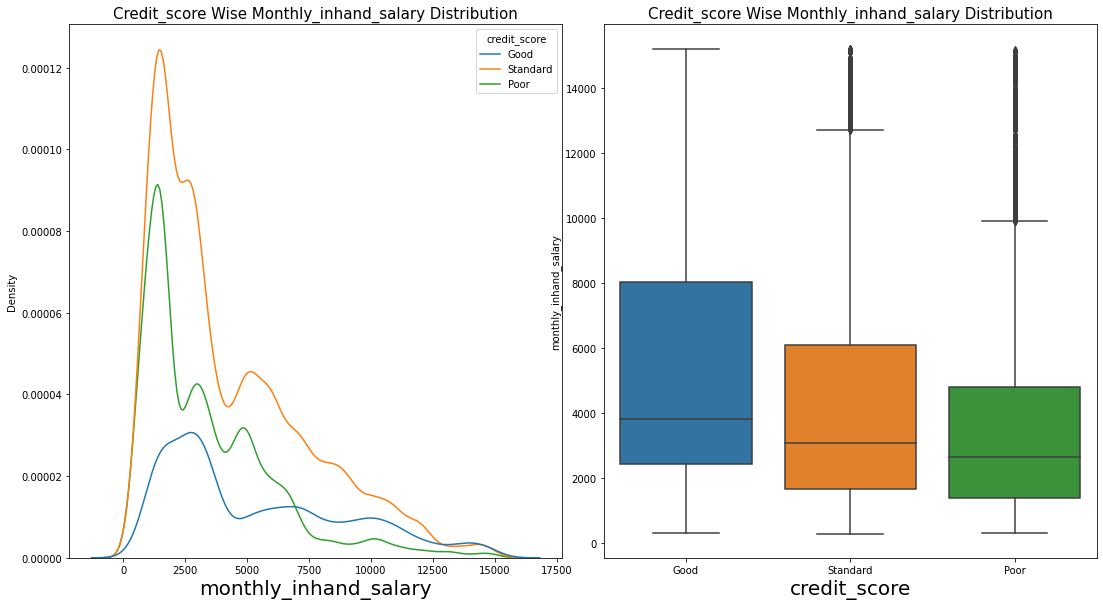

In [ ]:
side_by_side_plot(train,'credit_score','monthly_inhand_salary')

In [ ]:
group_summary(train,'credit_score','monthly_inhand_salary')

credit_score    count         mean          std         min          25%  \
0         Good  15070.0  5389.246647  3687.163627  332.128333  2426.564168   
2     Standard  45287.0  4242.037051  3131.861957  303.645417  1679.599167   
1         Poor  24641.0  3375.311674  2659.765189  319.556250  1397.685833   

           50%       75%           max  
0  3820.019167  8023.280  15204.633333  
2  3101.080414  6093.610  15204.633333  
1  2671.431667  4800.225  15167.180000

#### The customer's monthly in-hand salary column looks normally distributed.

#### The above plot and summary explain that there is difference between the monthly salary mean and the credit score category.

### Let's see how many bank accounts the customer has and is there any relationship between the number of bank accounts and credit score.

### In this dataset some customers have more than 10 and more than 100 and some have more than 1000 bank accounts(might be due to data entry error). So let's filter the number of bank accounts column by less than 11 accounts.

### Almost 98 percent of customers have less than 11 bank accounts.

In [ ]:
train[train['num_bank_accounts']<11].shape

(98676, 32)

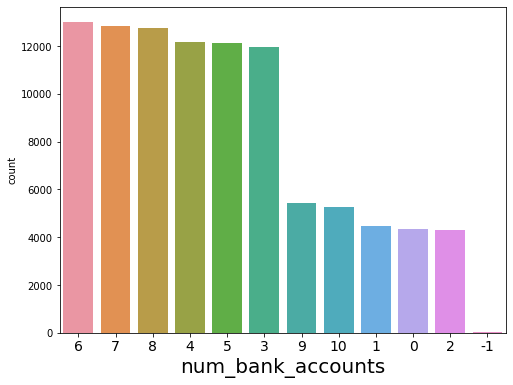

In [ ]:
count_plot(train[train['num_bank_accounts']<11],'num_bank_accounts')

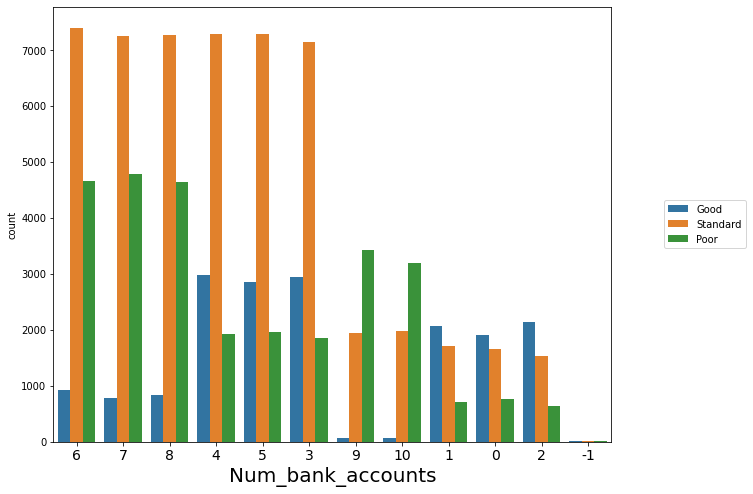

In [ ]:
grp_count_plot(train[train['num_bank_accounts']<11],'num_bank_accounts','credit_score')

#### The above plot explains that most of the customers have 3 to 8 bank accounts.

In [ ]:
group_by_perc(train[train['num_bank_accounts']<11],'num_bank_accounts','credit_score')

num_bank_accounts credit_score  count  percentage
23                  6     Standard   7404        7.50
20                  5     Standard   7289        7.39
17                  4     Standard   7289        7.39
29                  8     Standard   7274        7.37
26                  7     Standard   7257        7.35
14                  3     Standard   7139        7.23
25                  7         Poor   4781        4.85
22                  6         Poor   4665        4.73
28                  8         Poor   4647        4.71
31                  9         Poor   3431        3.48
34                 10         Poor   3201        3.24
15                  4         Good   2976        3.02
12                  3         Good   2947        2.99
18                  5         Good   2859        2.90
9                   2         Good   2135        2.16
6                   1         Good   2063        2.09
19                  5         Poor   1970        2.00
35                 10     Standard   1972        2.00
32                  9     Standard   1949        1.98
16                  4         Poor   1921        1.95
3                   0         Good   1914        1.94
13                  3         Poor   1864        1.89
8                   1     Standard   1721        1.74
5                   0     Standard   1653        1.68
11                  2     Standard   1535        1.56
21                  6         Good    932        0.94
27                  8         Good    844        0.86
24                  7         Good    785        0.80
4                   0         Poor    761        0.77
7                   1         Poor    706        0.72
10                  2         Poor    634        0.64
33                 10         Good     74        0.07
30                  9         Good     63        0.06
2                  -1     Standard      6        0.01
1                  -1         Poor      7        0.01
0                  -1         Good      8        0.01

### Let's see how many credit cards the customer has and is there any relationship between the number of credit cards and credit score.

### In this dataset some customers have more than 10 and more than 100 and some have more than 1000 credit cards(might be due to data entry error). So let's filter the number of credit card column by less than 11 cards.

### Almost 97 percent of customers have less than 11 credit cards.

In [ ]:
train['num_credit_card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: num_credit_card, dtype: float64

In [ ]:
train[train['num_credit_card']<11].shape

(97693, 32)

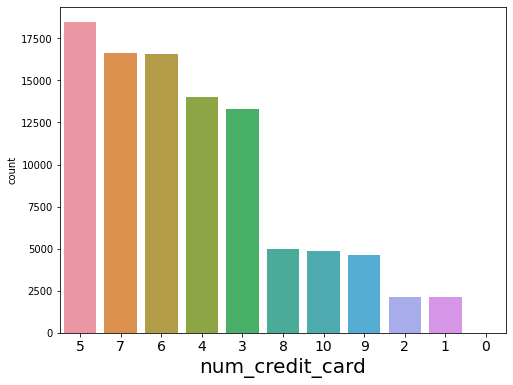

In [ ]:
count_plot(train[train['num_credit_card']<11],'num_credit_card')

In [ ]:
train[train['num_credit_card']<11]['num_credit_card'].value_counts()

5     18459
7     16615
6     16559
4     14030
3     13277
8      4956
10     4860
9      4643
2      2149
1      2132
0        13
Name: num_credit_card, dtype: int64

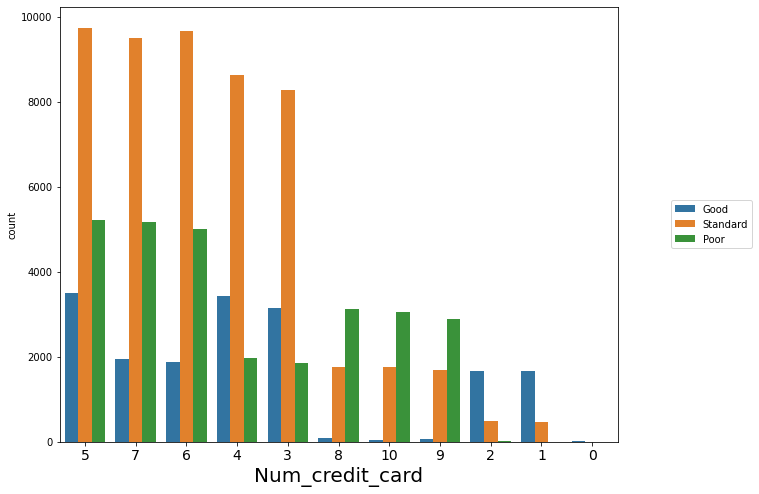

In [ ]:
grp_count_plot(train[train['num_credit_card']<11],'num_credit_card','credit_score')

#### The above plot explains that most of the customers have 3 to 7 credit cards.

In [ ]:
group_by_perc(train[train['num_credit_card']<11],'num_credit_card','credit_score')

num_credit_card credit_score  count  percentage
16                5     Standard   9742        9.97
19                6     Standard   9672        9.90
22                7     Standard   9495        9.72
13                4     Standard   8626        8.83
10                3     Standard   8267        8.46
15                5         Poor   5217        5.34
21                7         Poor   5177        5.30
18                6         Poor   5013        5.13
14                5         Good   3500        3.58
11                4         Good   3427        3.51
8                 3         Good   3157        3.23
24                8         Poor   3115        3.19
30               10         Poor   3058        3.13
27                9         Poor   2898        2.97
12                4         Poor   1977        2.02
20                7         Good   1943        1.99
17                6         Good   1874        1.92
9                 3         Poor   1853        1.90
31               10     Standard   1766        1.81
25                8     Standard   1750        1.79
28                9     Standard   1682        1.72
2                 1         Good   1663        1.70
5                 2         Good   1654        1.69
7                 2     Standard    481        0.49
4                 1     Standard    467        0.48
23                8         Good     91        0.09
26                9         Good     63        0.06
29               10         Good     36        0.04
6                 2         Poor     14        0.01
0                 0         Good     10        0.01
1                 0     Standard      3        0.00
3                 1         Poor      2        0.00

### Let's see the distribution of interest rates on credit cards and see if is there any differences between the interest rate and credit score.

### In this dataset, some customers have more than 50% and more than 100% and some have more than 1000% interest rates on credit cards(might be due to data entry error). So let's filter the interest rate column by less than 30%.

### Almost 97 percent of customers have less than 60 percent interest.

In [ ]:
train[train['interest_rate']<50].shape

(97966, 32)

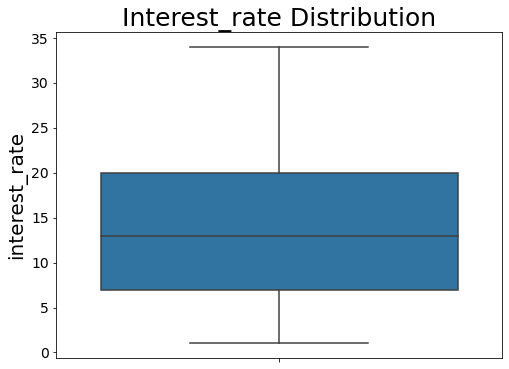

In [ ]:
box_plot(train[train['interest_rate']<50],'interest_rate',rot=90)

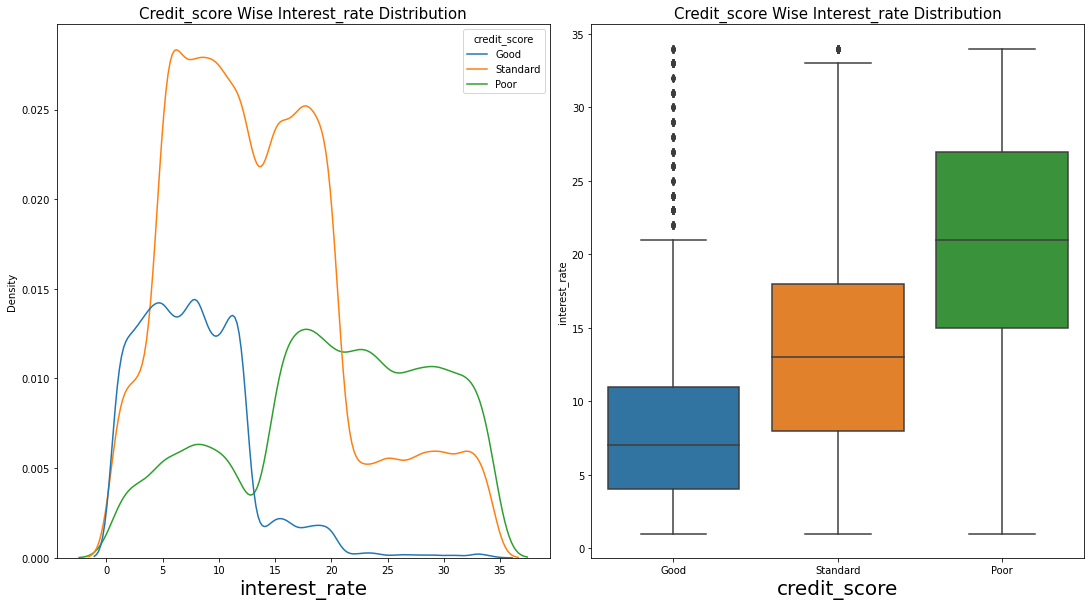

In [ ]:
side_by_side_plot(train[train['interest_rate']<50],'credit_score','interest_rate')

In [ ]:
group_summary(train[train['interest_rate']<50],'credit_score','interest_rate')

credit_score    count       mean       std  min   25%   50%   75%   max
1         Poor  28414.0  20.177166  8.870669  1.0  15.0  21.0  27.0  34.0
2     Standard  52121.0  13.750273  7.677922  1.0   8.0  13.0  18.0  34.0
0         Good  17431.0   7.665137  4.881337  1.0   4.0   7.0  11.0  34.0

#### The above box plot and summary explain that there is a difference between the credit card interest rate mean and the credit score category.

### Let's see how many loans are taken by a customer and if is there any relationship between the number of loans and credit score.

### The number of loan column contains non-numeric values. Let's remove those and convert the column into an integer data type.

### There are 8661 rows which contains non-numeric(-,_) values.

In [ ]:
train['num_of_loan'].str.contains("([^0-9]+)").value_counts() 

False    91339
True      8661
Name: num_of_loan, dtype: int64

In [ ]:
train['num_of_loan'].str.extract("([^0-9]+)").value_counts() 

_    4785
-    3876
dtype: int64

In [ ]:
train['num_of_loan']=train['num_of_loan'].apply(lambda x: re.sub('[\_\-]','',str(x)))

In [ ]:
train['num_of_loan']=train['num_of_loan'].astype(int)

In [ ]:
train['num_of_loan'].describe()

count    100000.000000
mean         10.761960
std          61.789933
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        1496.000000
Name: num_of_loan, dtype: float64

### In this dataset, some customers have more than 10 and more than 100 and some have more than 1000 loans taken from banks (might be due to data entry error). So let's filter the number of loan column by less than 11.

### Almost 95 percent of customers have less than 11 loans taken from the bank.

In [ ]:
train[train['num_of_loan']<11].shape

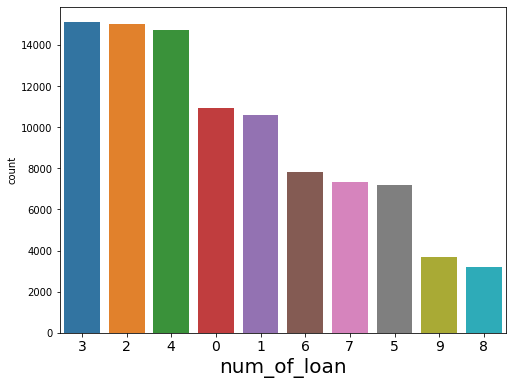

In [ ]:
count_plot(train[train['num_of_loan']<11],'num_of_loan')

In [ ]:
train[train['num_of_loan']<11]['num_of_loan'].value_counts()

3    15104
2    15032
4    14743
0    10930
1    10606
6     7803
7     7344
5     7197
9     3702
8     3191
Name: num_of_loan, dtype: int64

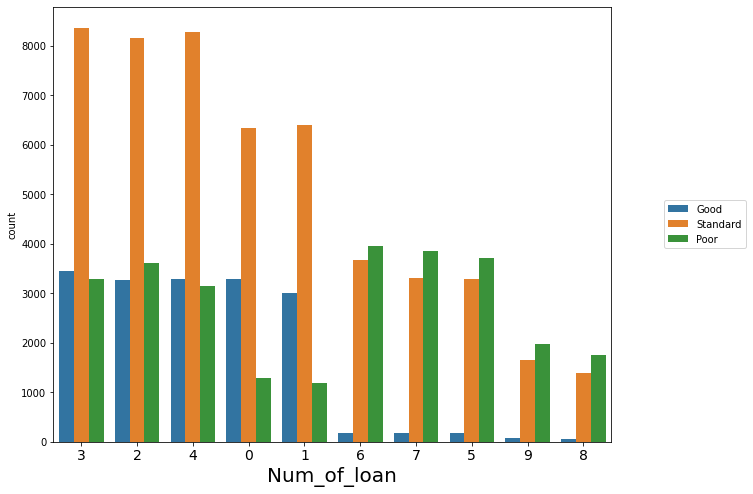

In [ ]:
grp_count_plot(train[train['num_of_loan']<11],'num_of_loan','credit_score')

In [ ]:
group_by_perc(train[train['num_of_loan']<11],'num_of_loan','credit_score')

num_of_loan credit_score  count  percentage
11            3     Standard   8371        8.75
14            4     Standard   8288        8.66
8             2     Standard   8161        8.53
5             1     Standard   6399        6.69
2             0     Standard   6345        6.63
19            6         Poor   3959        4.14
22            7         Poor   3854        4.03
16            5         Poor   3715        3.88
20            6     Standard   3666        3.83
7             2         Poor   3606        3.77
9             3         Good   3451        3.61
23            7     Standard   3313        3.46
17            5     Standard   3299        3.45
12            4         Good   3297        3.45
0             0         Good   3294        3.44
10            3         Poor   3282        3.43
6             2         Good   3265        3.41
13            4         Poor   3158        3.30
3             1         Good   3010        3.15
28            9         Poor   1979        2.07
25            8         Poor   1749        1.83
29            9     Standard   1655        1.73
26            8     Standard   1384        1.45
1             0         Poor   1291        1.35
4             1         Poor   1197        1.25
21            7         Good    177        0.19
18            6         Good    178        0.19
15            5         Good    183        0.19
27            9         Good     68        0.07
24            8         Good     58        0.06

#### The above plot and summary explain that the customers who have taken 5 to 9 loans from banks, they are mostly fallen under the standard and poor credit score category,

### Let's see what are the various types of loans taken by the customer from the bank.


In [ ]:
train['type_of_loan'].nunique()

6260

### The type of loan columns are values separated by comma values. Let's take the unique type of loans from it.

In [ ]:
loan_type=[]
for i in train['type_of_loan']:
  for j in str(i).split(","):
   s=j.strip().lower()
   loan_type.append(re.sub("and","",s).strip())

loan_type=set(loan_type)

In [ ]:
loan_type

{'auto loan',
 'credit-builder loan',
 'debt consolidation loan',
 'home equity loan',
 'mortgage loan',
 'nan',
 'not specified',
 'payday loan',
 'personal loan',
 'student loan'}

#### The above types of loans are mostly taken by the customers from banks.

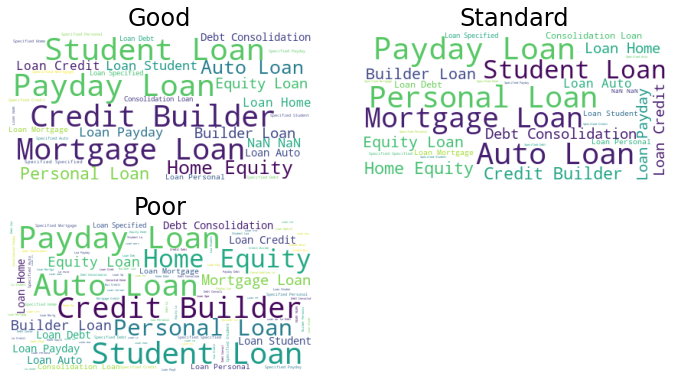

In [ ]:
c=1
plt.figure(figsize=(10, 8))
for x in train['credit_score'].unique():
    plt.subplot(3,2,c)
    wc = WordCloud(background_color="white", max_words=100, stopwords=stopwords,
                   max_font_size=40, random_state=42).generate(train[train['credit_score']==x]['type_of_loan'].to_string())  
   
    
    plt.imshow(wc)
    plt.title(x,fontsize='24',fontweight='20')
    plt.axis("off")
    plt.tight_layout()
    c+=1

In [ ]:
for x in train['credit_score'].unique():
  print("="*100)
  print(f"Credit Score Category:{x}\n")
  print("Top 10 loan categories")
  print("-"*100)
  print(train[train['credit_score']==x]['type_of_loan'].value_counts().nlargest(10))
  print("."*100)

Credit Score Category:Good

Top 10 loan categories
----------------------------------------------------------------------------------------------------
Mortgage Loan                      381
Not Specified                      366
Credit-Builder Loan                363
Personal Loan                      360
Payday Loan                        358
Student Loan                       352
Home Equity Loan                   345
Debt Consolidation Loan            331
Auto Loan                          314
Personal Loan, and Student Loan     90
Name: type_of_loan, dtype: int64
....................................................................................................
Credit Score Category:Standard

Top 10 loan categories
----------------------------------------------------------------------------------------------------
Not Specified                          844
Debt Consolidation Loan                815
Credit-Builder Loan                    799
Personal Loan                          

#### Let's see the average number of days delay from the payment date.

In [ ]:
train['delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66])

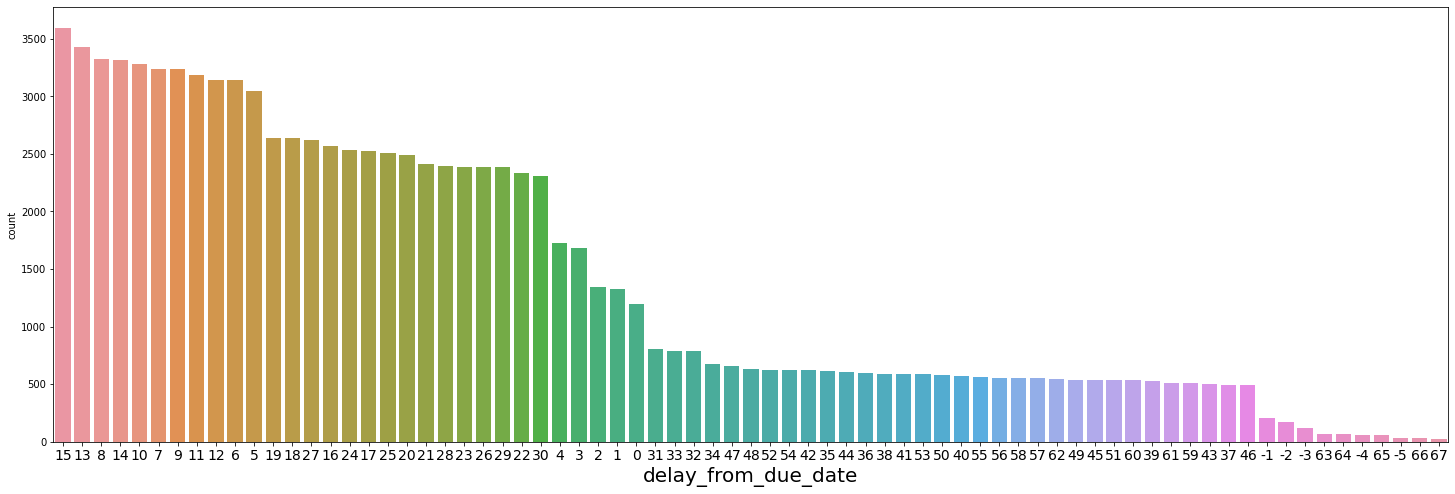

In [ ]:
count_plot(train,'delay_from_due_date',size=(25,8))

In [ ]:
train.groupby('delay_from_due_date')['delay_from_due_date'].agg({'count'}).sort_values('count',ascending=False)

count
delay_from_due_date       
 15                   3596
 13                   3424
 8                    3324
 14                   3313
 10                   3281
...                    ...
-4                      62
 65                     56
-5                      33
 66                     32
 67                     22

[73 rows x 1 columns]

### Let's see is there any relationship between average number of payment delay and credit score.

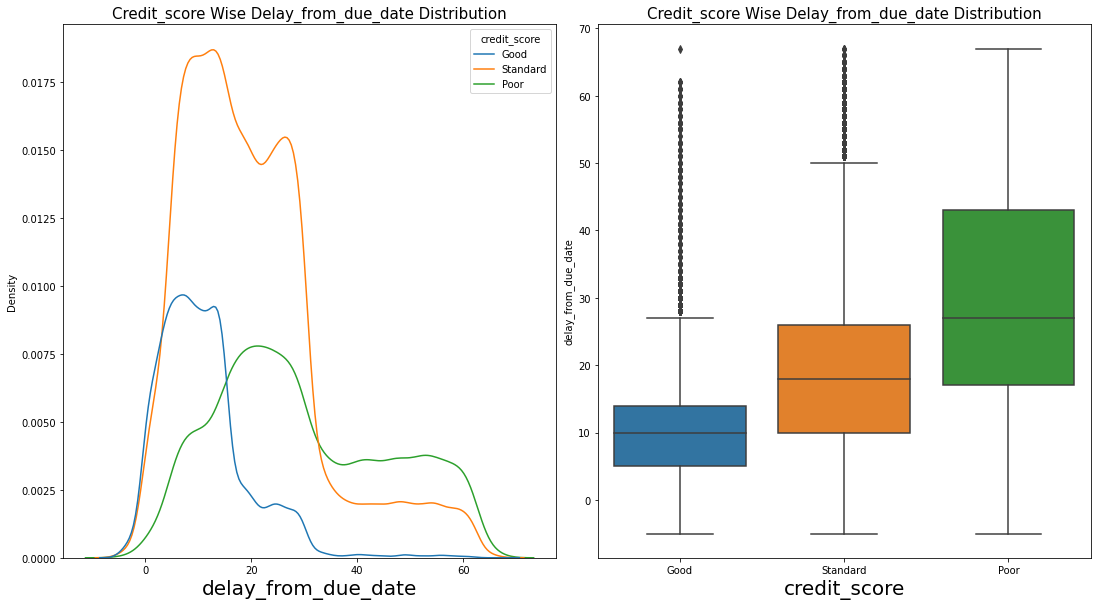

In [ ]:
side_by_side_plot(train,'credit_score','delay_from_due_date')

In [ ]:
group_summary(train,'credit_score','delay_from_due_date')

credit_score    count       mean        std  min   25%   50%   75%   max
1         Poor  28998.0  29.744051  16.311695 -5.0  17.0  27.0  43.0  67.0
2     Standard  53174.0  19.749577  12.988397 -5.0  10.0  18.0  26.0  67.0
0         Good  17828.0  10.892753   8.458714 -5.0   5.0  10.0  14.0  67.0

#### The above boxplot and summary explain that there is a difference between the average number of payment delays and credit scores.

### Let's see the number of days delayed payments by the customers.

### The number of delayed payment columns contains non-numeric values(_,-).

### Let's remove the non-numeric values from the column and convert it into the numerical column.

In [ ]:
train['num_of_delayed_payment'].str.contains("([^0-9])").value_counts()

False    89632
True      3366
Name: num_of_delayed_payment, dtype: int64

In [ ]:
train['num_of_delayed_payment'].str.extract("([^0-9])").value_counts()

_    2722
-     644
dtype: int64

In [ ]:
train['num_of_delayed_payment']=train['num_of_delayed_payment'].apply(lambda x:re.sub("[\_\-]","",str(x)))

In [ ]:
train['num_of_delayed_payment']=train['num_of_delayed_payment'].replace({'nan':np.nan})

In [ ]:
train['num_of_delayed_payment']=pd.to_numeric(train['num_of_delayed_payment'],errors='coerce',downcast='integer')

#### The number of delayed payment columns has many null values let's replace it with some arbitrary value.Then, conver it integer data type.

In [ ]:
train['num_of_delayed_payment']=train['num_of_delayed_payment'].fillna(888888)

In [ ]:
train['num_of_delayed_payment']=train['num_of_delayed_payment'].astype('int')

In [ ]:
train['num_of_delayed_payment'].nunique()

709

### In this dataset, some customers have more than 30 and more than 100 and some have more than 1000 average number of delayed payments (might be due to data entry error). So let's filter the number of delayed payment columns by less than 30.



In [ ]:
train[train['num_of_delayed_payment']<30].shape

(92262, 28)

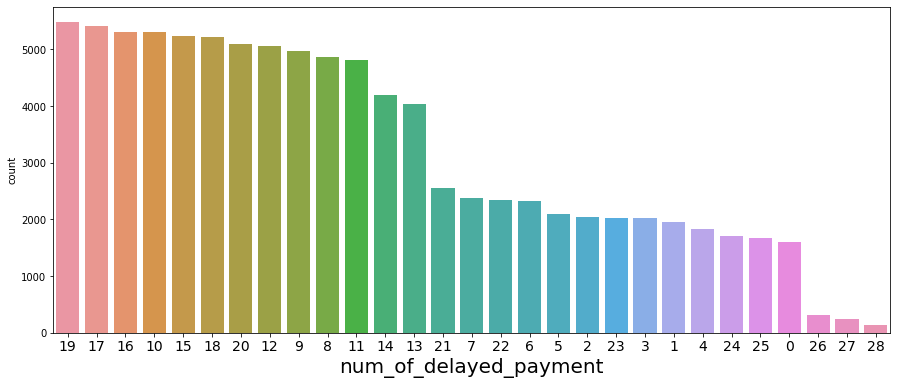

In [ ]:
count_plot(train[train['num_of_delayed_payment']<30],'num_of_delayed_payment',size=(15,6))

### Let's see is there any relationship between the average number of delays by customers and credit score.

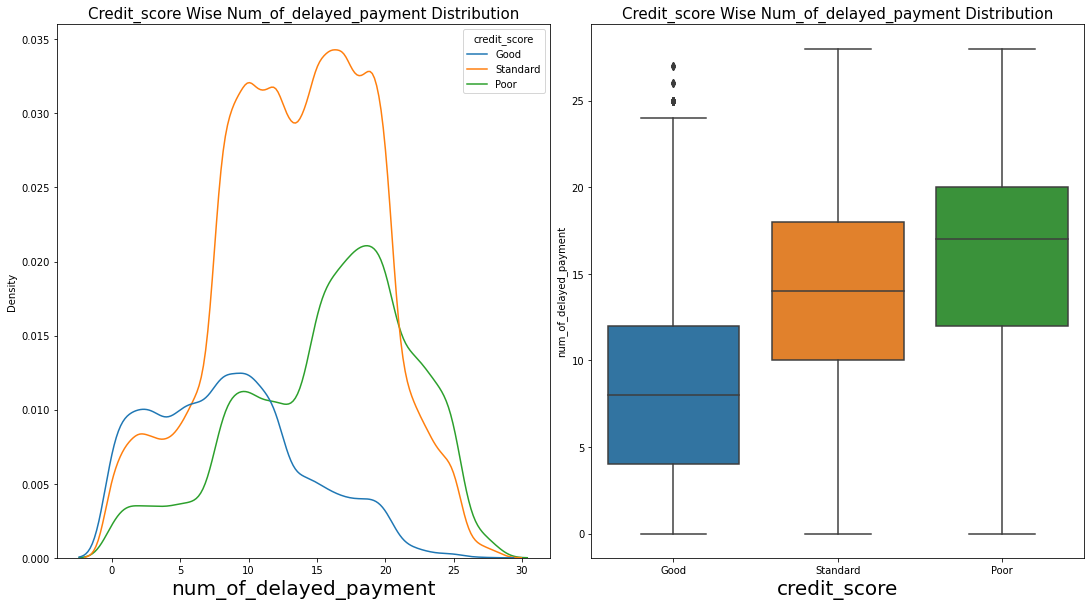

In [ ]:
side_by_side_plot(train[train['num_of_delayed_payment']<30],'credit_score','num_of_delayed_payment')

In [ ]:
group_summary(train[train['num_of_delayed_payment']<30],'credit_score','num_of_delayed_payment')

credit_score    count       mean       std  min   25%   50%   75%   max
1         Poor  26797.0  15.848229  6.121462  0.0  12.0  17.0  20.0  28.0
2     Standard  49021.0  13.556374  5.657445  0.0  10.0  14.0  18.0  28.0
0         Good  16444.0   8.593651  5.539412  0.0   4.0   8.0  12.0  27.0

#### The above boxplot and summary explain that there is a difference between the average number of payment delays by customers and credit scores.


### Let's see the percentage of credit limit change.

### The credit limit changed column has a non-numeric value(-_). Let's remove it and convert the column to numeric type.

In [ ]:
train['changed_credit_limit'].str.contains("([^0-9.])").value_counts()

False    96323
True      3677
Name: changed_credit_limit, dtype: int64

In [ ]:
train['changed_credit_limit'].str.extract("([^0-9.])").value_counts()

_    2091
-    1586
dtype: int64

In [ ]:
train['changed_credit_limit']=train['changed_credit_limit'].apply(lambda x: re.sub("([\-\_])","",x))

In [ ]:
train['changed_credit_limit']=pd.to_numeric(train['changed_credit_limit'],errors='coerce')

In [ ]:
train['changed_credit_limit']=round(train['changed_credit_limit'],2)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


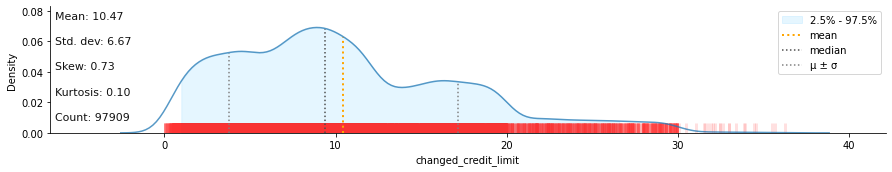

In [ ]:
klib.dist_plot(train['changed_credit_limit'])

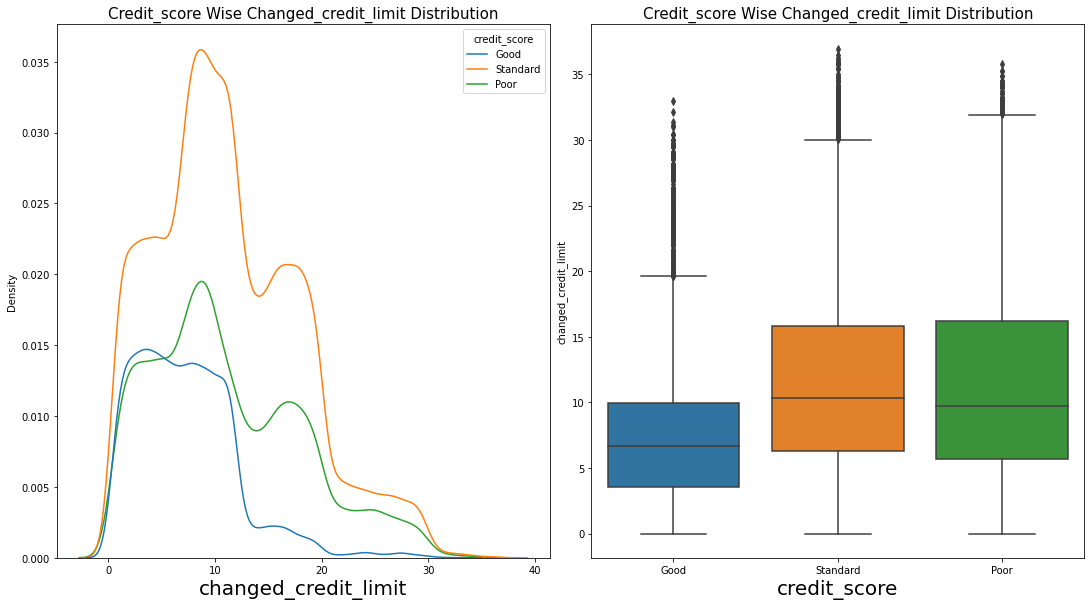

In [ ]:
side_by_side_plot(train,'credit_score','changed_credit_limit')

In [ ]:
group_summary(train,'credit_score','changed_credit_limit')

credit_score    count       mean       std  min   25%    50%    75%    max
2     Standard  52083.0  11.193560  6.687443  0.0  6.30  10.30  15.79  36.97
1         Poor  28361.0  11.123476  7.048135  0.0  5.65   9.73  16.17  35.82
0         Good  17465.0   7.226854  4.759920  0.0  3.55   6.70   9.99  32.98

#### The above histogram plot explains that the changed credit column is normally distributed.

#### The above boxplot and summary explain that there is a difference between the credit limit changed percentage mean and credit score.

### Let's see how many times the bank inquired about the customer's credit information.

### In this dataset, some customers have more than 30 and more than 100 and some have more than 1000 inquiries about credits by the bank(might be due to data entry error). So let's filter the number of inquiries columns by less than 20.

### Almost 96 percent of customer's credit information is inquired about by the bank less than 20 times.

In [ ]:
train[train['num_credit_inquiries']<20]['num_credit_inquiries'].shape

(96385,)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


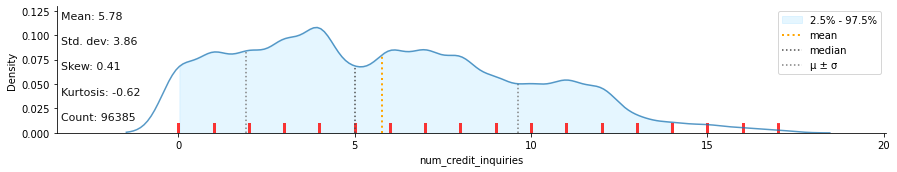

In [ ]:
klib.dist_plot(train[train['num_credit_inquiries']<20]['num_credit_inquiries'])

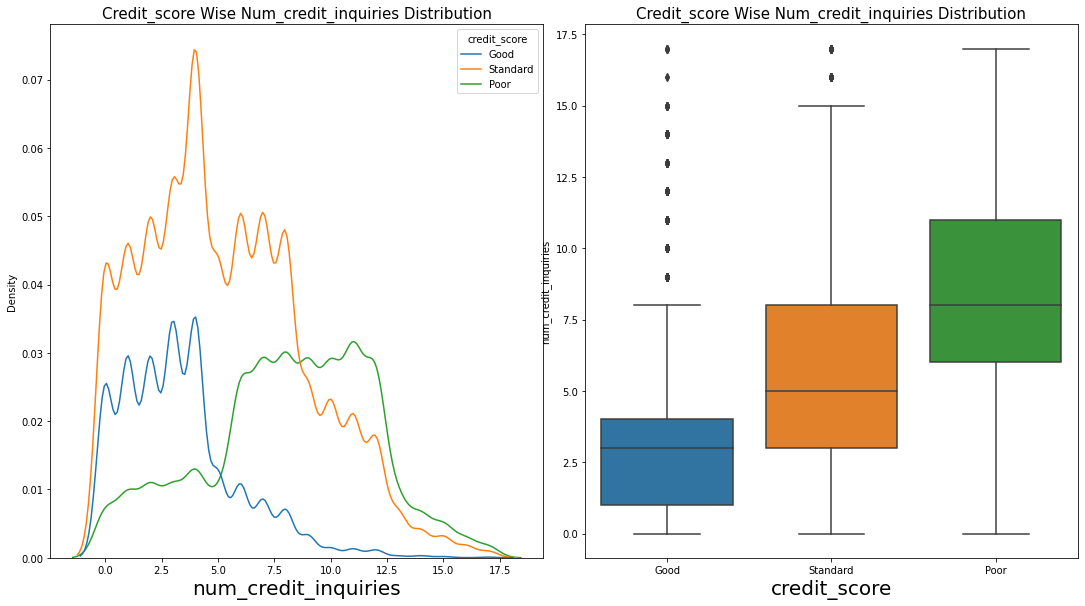

In [ ]:
side_by_side_plot(train[train['num_credit_inquiries']<20],'credit_score','num_credit_inquiries')

#### The above histogram plot explains that the number of credit inquiries column is normally distributed.

#### The above boxplot and summary explain that there is s difference between the number of credit inquiries and the credit score.

### Let's see credit mix column distribution.

### Credit mix refers to multiple types of loan accounts(auto loans, student loans, etc.) held by customers.

### Basically credit mix is based on the number of various loans taken by customers from banks.

In [ ]:
train['credit_mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: credit_mix, dtype: int64

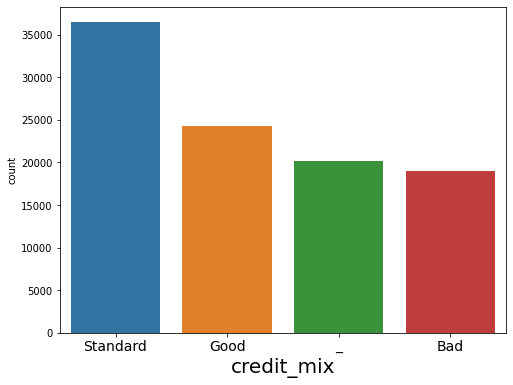

In [ ]:
count_plot(train,'credit_mix')

### Let's see if there is any relationship between the number of a loan taken by the customers from the banks and the credit score.

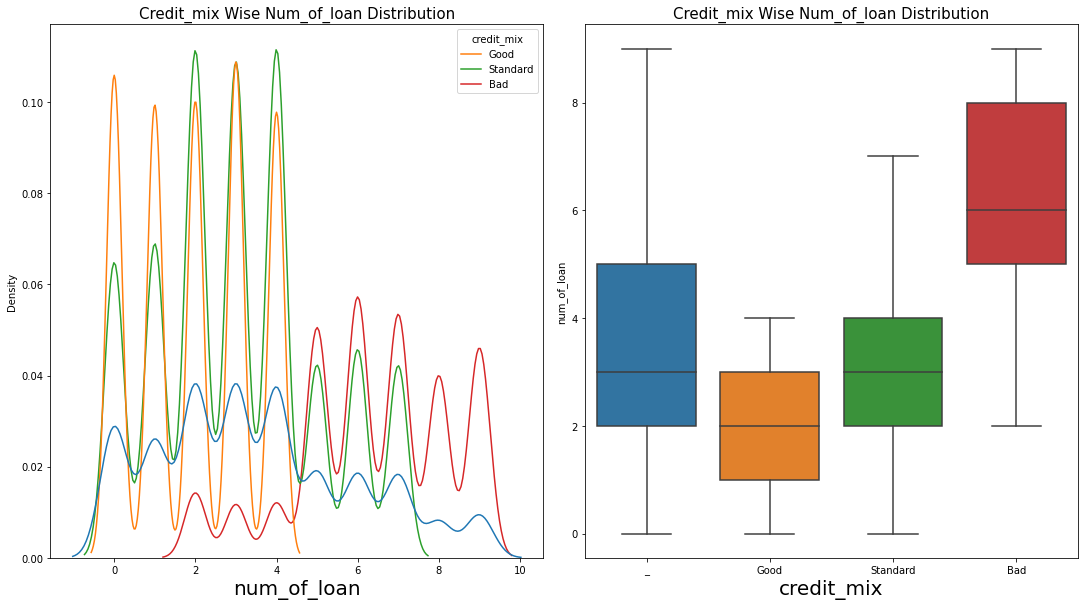

In [ ]:
side_by_side_plot(train[train['num_of_loan']<11],'credit_mix','num_of_loan')

In [ ]:
group_summary(train[train['num_of_loan']<11],'credit_mix','num_of_loan')

credit_mix    count      mean       std  min  25%  50%  75%  max
0        Bad  18182.0  6.367781  1.892433  2.0  5.0  6.0  8.0  9.0
3          _  19357.0  3.514284  2.454350  0.0  2.0  3.0  5.0  9.0
2   Standard  34875.0  3.097835  1.978292  0.0  2.0  3.0  4.0  7.0
1       Good  23238.0  1.986789  1.413284  0.0  1.0  2.0  3.0  4.0

#### The above boxplot and summary explain that there is a difference between the customer's number of loans mean and credit score.

### Let's see if there is any relationship between the credit mix and credit score.

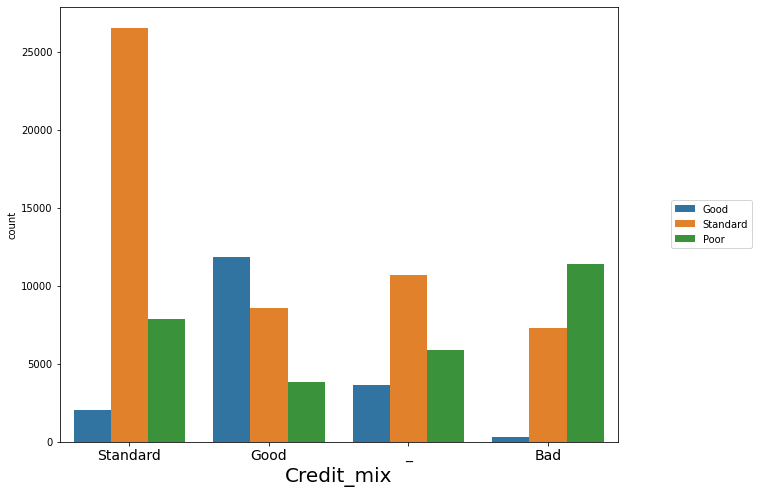

In [ ]:
grp_count_plot(train,'credit_mix','credit_score')

In [ ]:
group_by_perc(train,'credit_mix','credit_score')

credit_mix credit_score  count  percentage
8    Standard     Standard  26577       26.58
3        Good         Good  11875       11.88
1         Bad         Poor  11409       11.41
11          _     Standard  10704       10.70
5        Good     Standard   8601        8.60
7    Standard         Poor   7859        7.86
2         Bad     Standard   7292        7.29
10          _         Poor   5869        5.87
4        Good         Poor   3861        3.86
9           _         Good   3622        3.62
6    Standard         Good   2043        2.04
0         Bad         Good    288        0.29

### Let's see the customers oustanding debt.(USD) distribution.

### The outstanding debt. columns contains non-numeric values(_).

### Let's remove the non-numeric values from the column and convert it into the numerical column.

In [ ]:
train['outstanding_debt'].str.contains("([^0-9.]+)").value_counts()

False    98991
True      1009
Name: outstanding_debt, dtype: int64

In [ ]:
train['outstanding_debt'].str.extract("([^0-9.]+)").value_counts()

_    1009
dtype: int64

In [ ]:
train['outstanding_debt']=train['outstanding_debt'].apply(lambda x:re.sub("([\_])","",str(x)))

In [ ]:
train['outstanding_debt']=train['outstanding_debt'].astype('float')

In [ ]:
train['outstanding_debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: outstanding_debt, dtype: float64

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


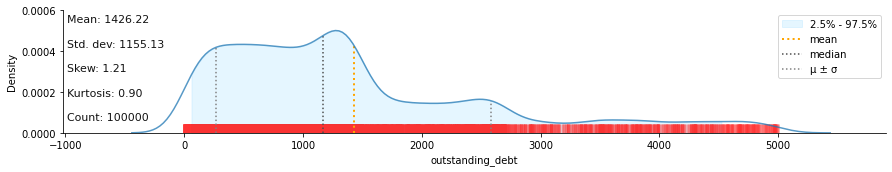

In [ ]:
klib.dist_plot(train['outstanding_debt'])

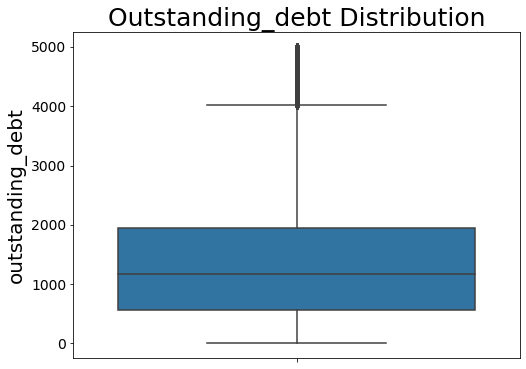

In [ ]:
box_plot(train,'outstanding_debt',rot=90)

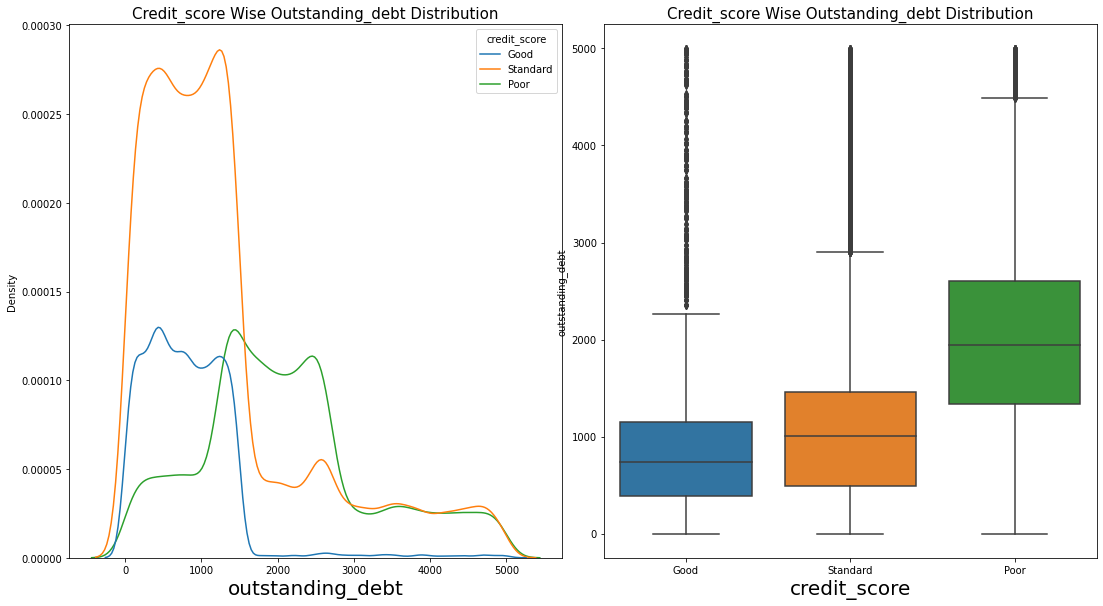

In [ ]:
side_by_side_plot(train,'credit_score','outstanding_debt')

In [ ]:
group_summary(train,'credit_score','outstanding_debt')

credit_score    count         mean          std   min      25%      50%  \
1         Poor  28998.0  2081.473157  1143.981741  0.54  1338.74  1945.35   
2     Standard  53174.0  1278.419552  1132.709570  0.23   490.98  1001.61   
0         Good  17828.0   801.256324   612.359240  0.23   382.35   736.47   

       75%      max  
1  2598.36  4997.10  
2  1454.48  4998.07  
0  1149.63  4998.07

#### The above boxplot and summary explain that there is a difference between the customer's outstanding debt mean and the credit score.

In [ ]:
train['credit_utilization_ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: credit_utilization_ratio, dtype: float64

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


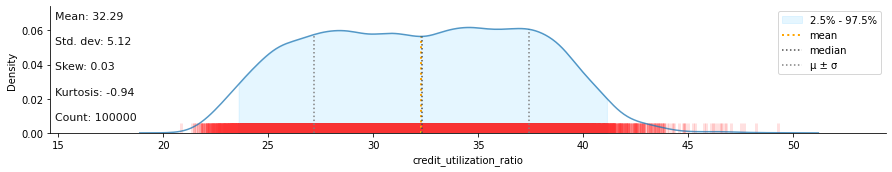

In [ ]:
klib.dist_plot(train['credit_utilization_ratio'])

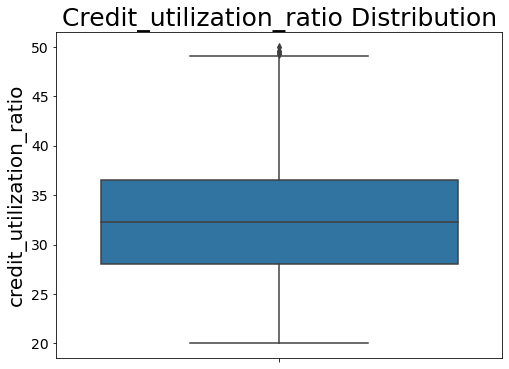

In [ ]:
box_plot(train,'credit_utilization_ratio',rot=90)

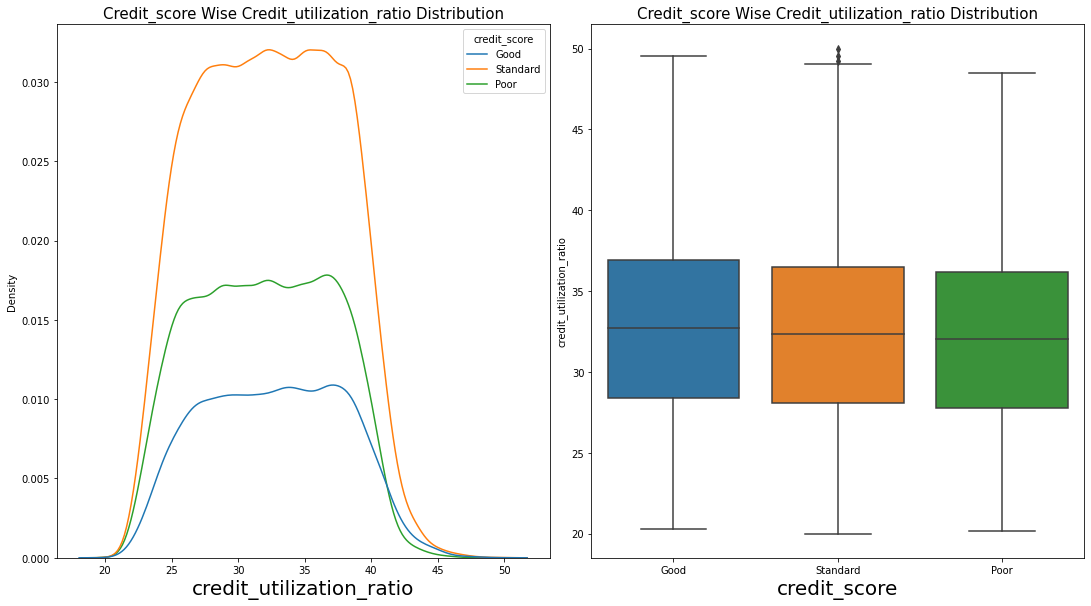

In [ ]:
side_by_side_plot(train,'credit_score','credit_utilization_ratio')

In [ ]:
group_summary(train,'credit_score','credit_utilization_ratio')

credit_score    count       mean       std        min        25%        50%  \
0         Good  17828.0  32.686107  5.209908  20.257073  28.405887  32.740826   
2     Standard  53174.0  32.313820  5.109304  20.000000  28.077605  32.326765   
1         Poor  28998.0  31.986146  5.054283  20.172942  27.782235  32.006945   

         75%        max  
0  36.913317  49.522324  
2  36.505445  50.000000  
1  36.211397  48.489852

#### The above histogram plot explains that the credit utilization ratio column is normally distributed.

#### The above boxplots and summary explain that there is no difference between the customer's credit card utilization ratio and the credit score.

#### credit card utilization ratio will not affect credit score.

### Let's see the credit history of the customers.

### The credit history column contains words and numbers. Let's extract only the number from the column and convert it into numerical columns.

### Column some null values are replaced by some random numbers.

In [ ]:
train['credit_history_age']

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: credit_history_age, Length: 100000, dtype: object

In [ ]:
def credit_hist_age(col):
  if re.match("(\d+)\s\w+\s\w+\s\d+\s\w+",col):
    year="".join(re.findall("(\d+)\s\w+\s\w+\s\d+\s\w+",col))
    months="".join(re.findall("\d+\s\w+\s\w+\s(\d+)\s\w+",col))
    return f"{year}.{months }"
  else:
    return 111.111


In [ ]:
train['credit_history_age']=train['credit_history_age'].apply(lambda x:credit_hist_age(str(x))).astype('float')

In [ ]:
train['credit_history_age']=round(train['credit_history_age'],2)

In [ ]:
train['credit_history_age'].describe()

count    100000.000000
mean         26.734662
std          27.741544
min           0.100000
25%          12.800000
50%          19.110000
75%          27.700000
max         111.110000
Name: credit_history_age, dtype: float64

### Let's filter the credit history age by less than 111 and see the distribution.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


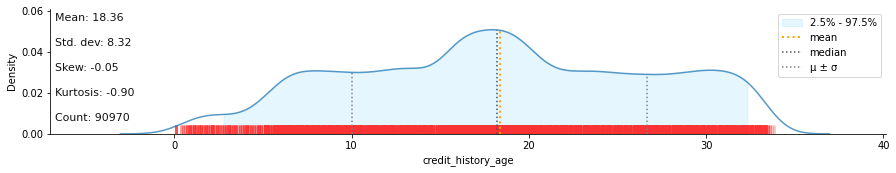

In [ ]:
klib.dist_plot(train[train['credit_history_age']<111.11]['credit_history_age'])

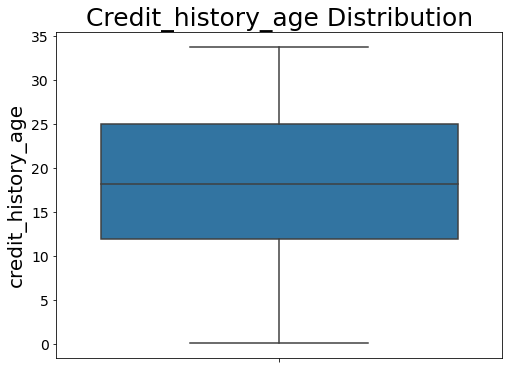

In [ ]:
box_plot(train[train['credit_history_age']<111.11],'credit_history_age',rot=90)

#### The column is normally distributed one.

### Let's see if there is any difference between customer credit history age and the credit score.

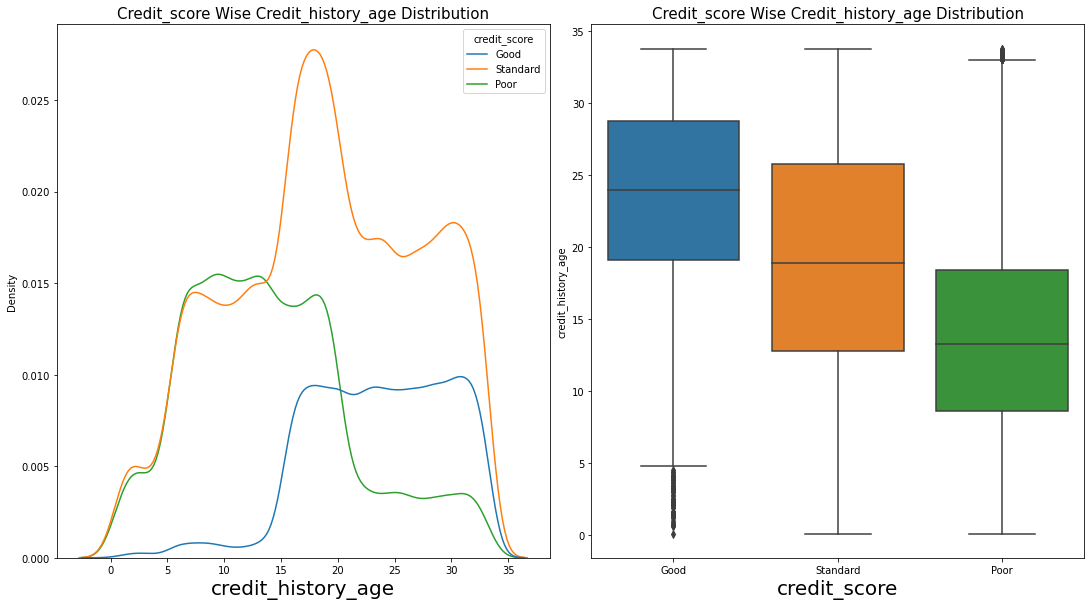

In [ ]:
side_by_side_plot(train[train['credit_history_age']<111.11],'credit_score','credit_history_age')

In [ ]:
group_summary(train[train['credit_history_age']<111.11],'credit_score','credit_history_age')

credit_score    count       mean       std  min   25%   50%   75%   max
0         Good  16224.0  23.658131  6.117445  0.1  19.1  24.0  28.8  33.8
2     Standard  48350.0  18.912904  8.292358  0.1  12.8  18.9  25.8  33.8
1         Poor  26396.0  14.088288  7.301877  0.1   8.6  13.3  18.4  33.8

#### The above boxplot and summary explain that there is a difference between the customer's credit history age mean and the credit score.

### Let's see whether the customers have paid only the minimum amount of their payment and see how it affects their credit score.

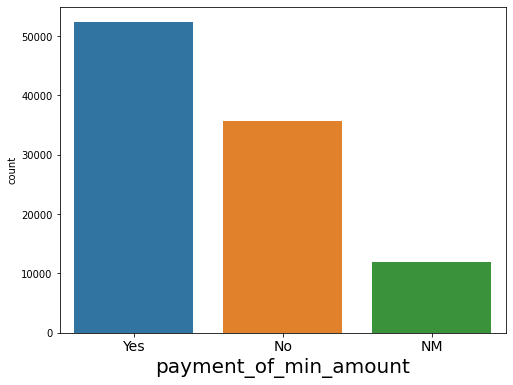

In [ ]:
count_plot(train,'payment_of_min_amount')

In [ ]:
train['payment_of_min_amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: payment_of_min_amount, dtype: int64

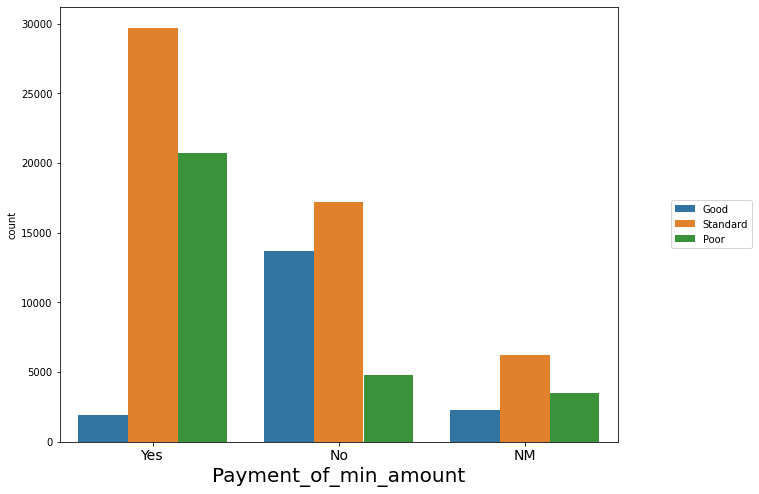

In [ ]:
grp_count_plot(train,'payment_of_min_amount','credit_score')

In [ ]:
group_by_perc(train,'payment_of_min_amount','credit_score')

payment_of_min_amount credit_score  count  percentage
8                   Yes     Standard  29706       29.71
7                   Yes         Poor  20708       20.71
5                    No     Standard  17224       17.22
3                    No         Good  13671       13.67
2                    NM     Standard   6244        6.24
4                    No         Poor   4772        4.77
1                    NM         Poor   3518        3.52
0                    NM         Good   2245        2.24
6                   Yes         Good   1912        1.91

### Let's see the total EMI per month column distribution and if there is any difference between emi per month and credit score.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


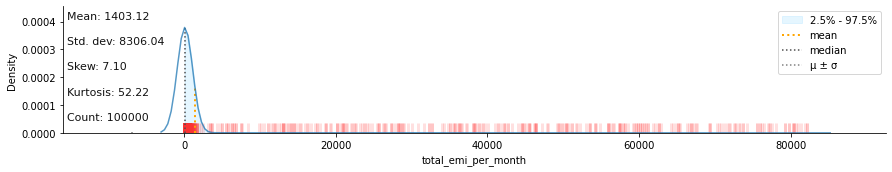

In [ ]:
klib.dist_plot(train['total_emi_per_month'])

In [ ]:
train['total_emi_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: total_emi_per_month, dtype: float64

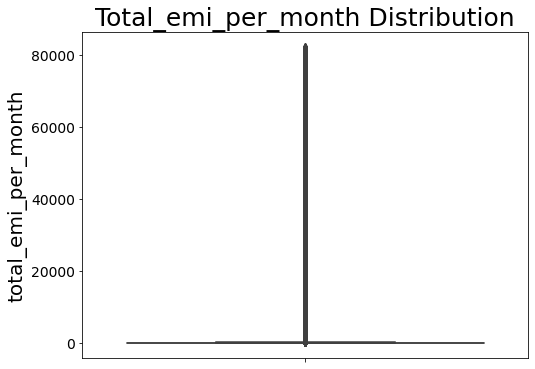

In [ ]:
box_plot(train,'total_emi_per_month',rot=90)

#### The above distribution is right(positive) skewed.

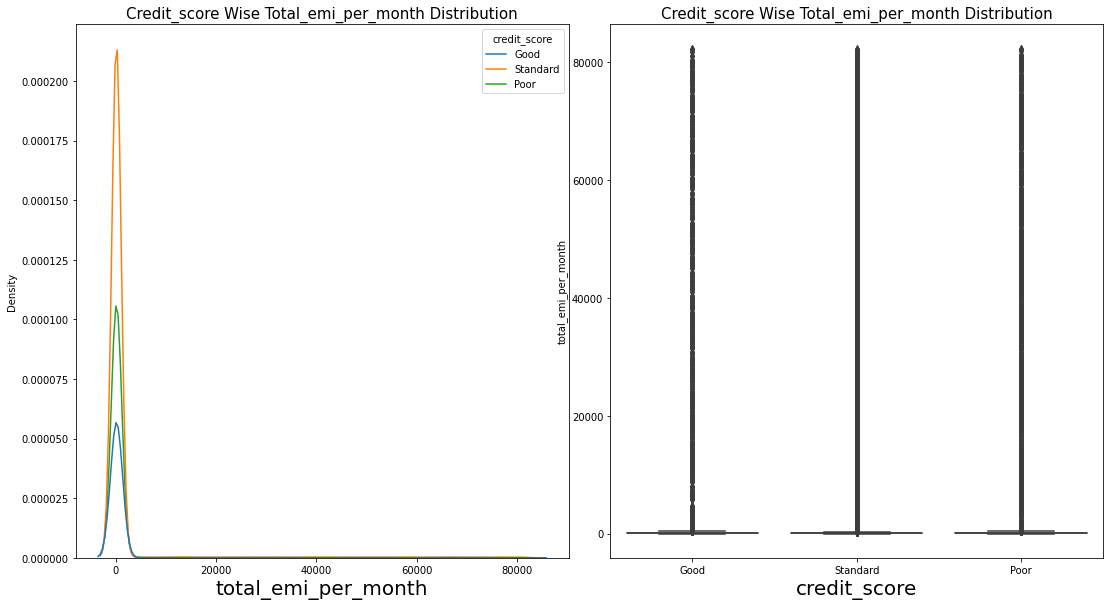

In [ ]:
side_by_side_plot(train,'credit_score','total_emi_per_month')

In [ ]:
group_summary(train,'credit_score','total_emi_per_month')

credit_score    count         mean          std  min        25%        50%  \
0         Good  17828.0  1477.199494  8464.748366  0.0  21.773529  64.811282   
2     Standard  53174.0  1399.650688  8318.917855  0.0  27.677496  65.873141   
1         Poor  28998.0  1363.931423  8182.985306  0.0  40.335282  77.713394   

          75%      max  
0  167.697526  82236.0  
2  152.651637  82193.0  
1  170.106767  82331.0

#### The above boxplot and summary explain that there is a little difference between the total EMI per month mean and the credit score.

### Let's see the distribution of monthly investment amounts by the customers and see if is there any differences between the monthly investment amount and the credit score.

### The monthly investment column contains non-numeric values(_). Let's remove it and convert the column to numeric.

In [ ]:
train['amount_invested_monthly'].str.contains("([^0-9.])").value_counts()

False    91216
True      4305
Name: amount_invested_monthly, dtype: int64

In [ ]:
train['amount_invested_monthly'].str.extract("([^0-9.])").value_counts()

_    4305
dtype: int64

In [ ]:
train['amount_invested_monthly']=train['amount_invested_monthly'].apply(lambda x:re.sub("(\_)","",str(x)))

In [ ]:
train['amount_invested_monthly']=round(train['amount_invested_monthly'].astype('float'),2)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


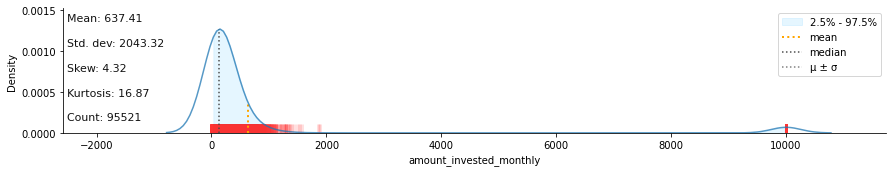

In [ ]:
klib.dist_plot(train['amount_invested_monthly'])

In [ ]:
train['amount_invested_monthly'].describe()

count    95521.000000
mean       637.413012
std       2043.319326
min          0.000000
25%         74.530000
50%        135.930000
75%        265.730000
max      10000.000000
Name: amount_invested_monthly, dtype: float64

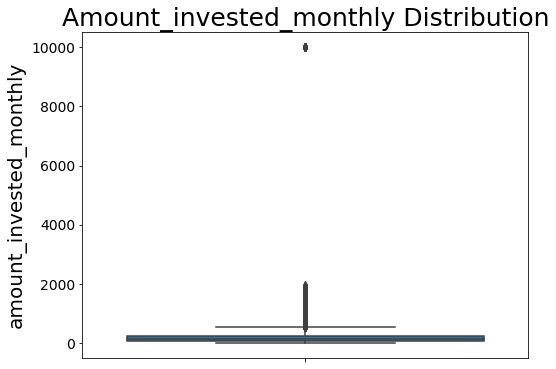

In [ ]:
box_plot(train,'amount_invested_monthly',rot=90)

#### The above plot explains that the monthly investment column is right(positive) skewed.

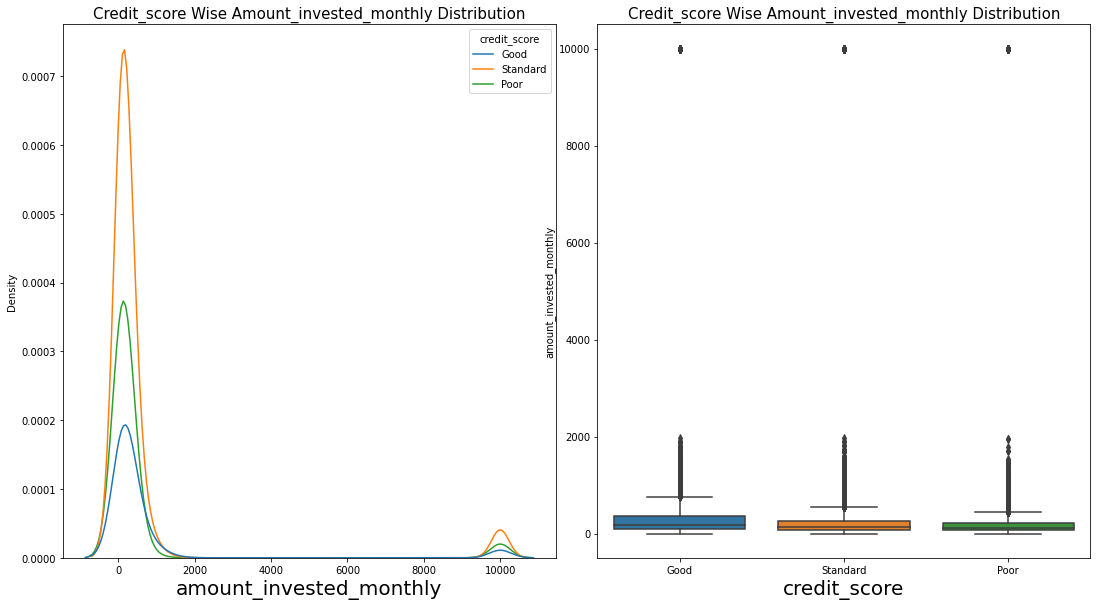

In [ ]:
side_by_side_plot(train,'credit_score','amount_invested_monthly')

In [ ]:
group_summary(train,'credit_score','amount_invested_monthly')

credit_score    count        mean          std  min      25%      50%  \
0         Good  17005.0  691.437239  2032.580426  0.0  88.2800  167.130   
2     Standard  50850.0  631.400262  2030.753996  0.0  75.2725  137.290   
1         Poor  27666.0  615.258251  2072.221025  0.0  67.8100  119.365   

        75%      max  
0  358.5700  10000.0  
2  267.0025  10000.0  
1  218.4100  10000.0

#### The above boxplot and summary explain that there is a little difference between the monthly amount investment mean and the credit score.

### Let's the payment behavior of customers and see whether it affects their credit score or not.

### The column contains special characters as category. Let's remove it.

In [ ]:
train['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
train['payment_behaviour'].str.contains("([^a-zA-z]+)").value_counts()

False    92400
True      7600
Name: payment_behaviour, dtype: int64

In [ ]:
train['payment_behaviour'].str.extract("([^a-zA-z]+)").value_counts()

!@9#%8    7600
dtype: int64

In [ ]:
train['payment_behaviour']=train['payment_behaviour'].apply(lambda x: re.sub("([^a-zA-z]+)","",str(x)))

In [ ]:
train['payment_behaviour']=train['payment_behaviour'].apply(lambda x: np.nan if len(x)==0 else x)

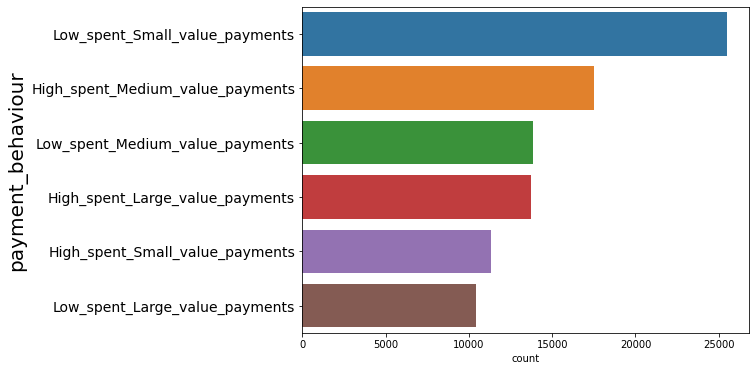

In [ ]:
count_plot(train,'payment_behaviour',switchax=True)

In [ ]:
train['payment_behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: payment_behaviour, dtype: int64

In [ ]:
train['payment_behaviour'].isnull().value_counts()

False    92400
True      7600
Name: payment_behaviour, dtype: int64

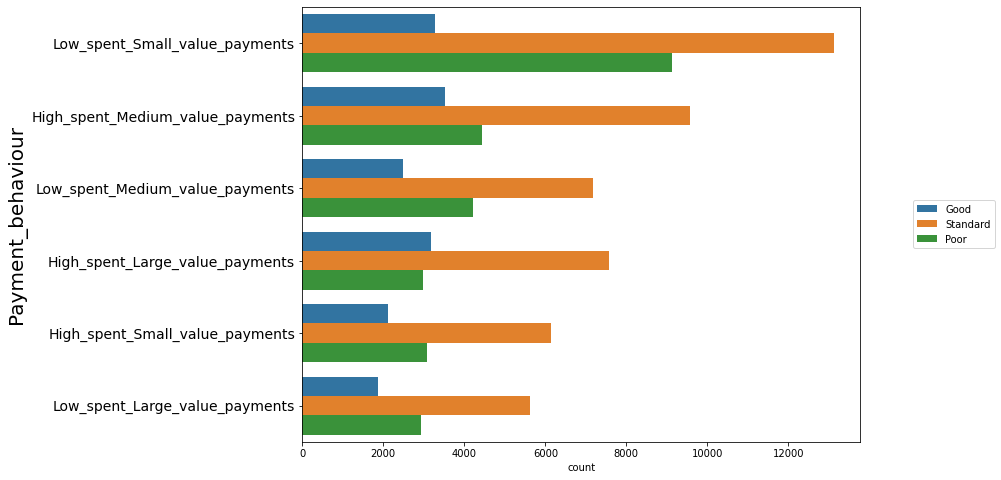

In [ ]:
grp_count_plot(train,'payment_behaviour','credit_score',switchax=True)

In [ ]:
group_by_perc(train,'payment_behaviour','credit_score')

payment_behaviour credit_score  count  percentage
17    Low_spent_Small_value_payments     Standard  13115       14.19
5   High_spent_Medium_value_payments     Standard   9577       10.36
16    Low_spent_Small_value_payments         Poor   9125        9.88
2    High_spent_Large_value_payments     Standard   7570        8.19
14   Low_spent_Medium_value_payments     Standard   7168        7.76
8    High_spent_Small_value_payments     Standard   6138        6.64
11    Low_spent_Large_value_payments     Standard   5614        6.08
4   High_spent_Medium_value_payments         Poor   4439        4.80
13   Low_spent_Medium_value_payments         Poor   4211        4.56
3   High_spent_Medium_value_payments         Good   3524        3.81
15    Low_spent_Small_value_payments         Good   3273        3.54
0    High_spent_Large_value_payments         Good   3172        3.43
7    High_spent_Small_value_payments         Poor   3088        3.34
1    High_spent_Large_value_payments         Poor   2979        3.22
10    Low_spent_Large_value_payments         Poor   2931        3.17
12   Low_spent_Medium_value_payments         Good   2482        2.69
6    High_spent_Small_value_payments         Good   2114        2.29
9     Low_spent_Large_value_payments         Good   1880        2.03

### Let's the distribution of the customer's monthly balance and see if there is any difference between the monthly balance and credit score.

### The column contains non-numerical values(_). Let's remove it and convert the column to numeric.

### Some customers have a lower than zero amount balance. So filter the column by greater than 0.

In [ ]:
train['monthly_balance'].str.extract("([^0-9.])").value_counts()

_    9
dtype: int64

In [ ]:
train['monthly_balance'].str.contains("([^0-9.])").value_counts()

False    97123
True         9
Name: monthly_balance, dtype: int64

In [ ]:
train['monthly_balance'].isnull().value_counts()

False    98800
True      1200
Name: monthly_balance, dtype: int64

In [ ]:
train['monthly_balance']=train['monthly_balance'].apply(lambda x: re.sub("([\_]+)","",str(x)))

In [ ]:
train['monthly_balance']=train['monthly_balance'].astype('float')
train['monthly_balance']=round(train['monthly_balance'],2)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


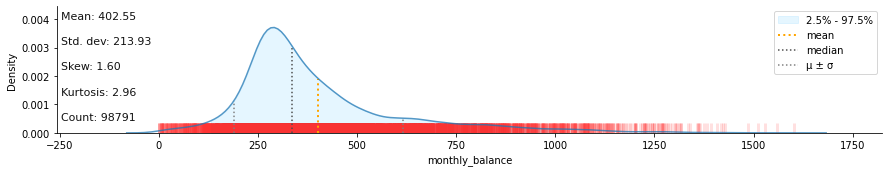

In [ ]:
klib.dist_plot(train[train['monthly_balance']>0]['monthly_balance'])

In [ ]:
train[train['monthly_balance']>0]['monthly_balance'].describe()

count    98791.000000
mean       402.551261
std        213.925513
min          0.010000
25%        270.110000
50%        336.730000
75%        470.265000
max       1602.040000
Name: monthly_balance, dtype: float64

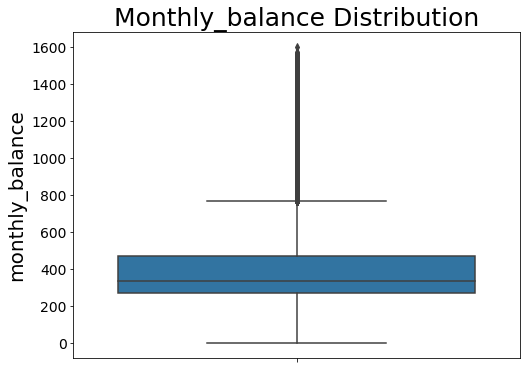

In [ ]:
box_plot(train[train['monthly_balance']>0],'monthly_balance',rot=90)

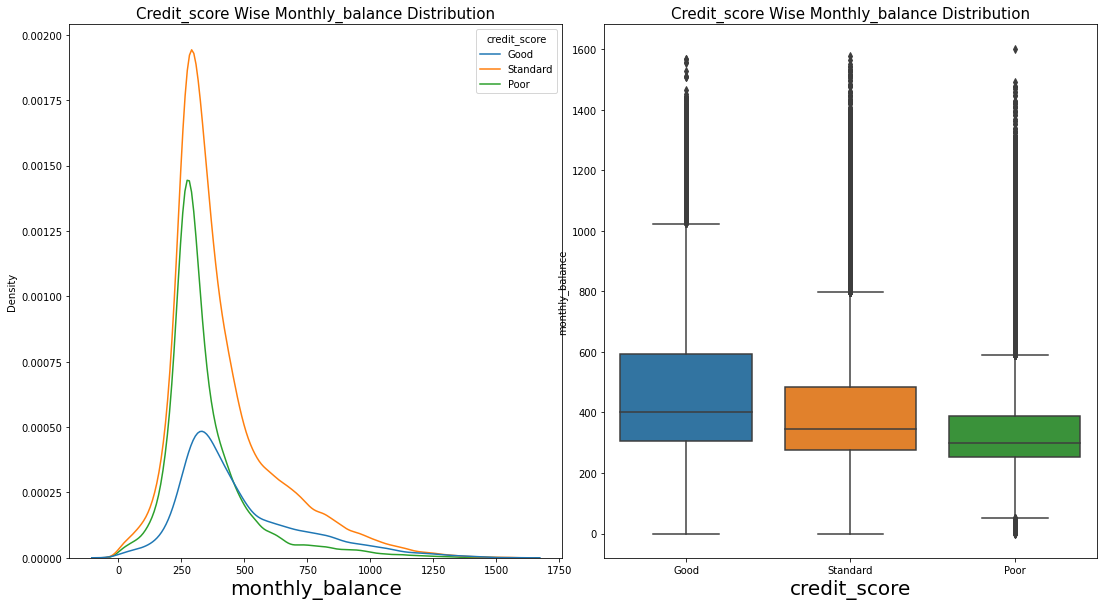

In [ ]:
side_by_side_plot(train[train['monthly_balance']>0],'credit_score','monthly_balance')

In [ ]:
group_summary(train[train['monthly_balance']>0],'credit_score','monthly_balance')

credit_score    count        mean         std   min       25%     50%  \
0         Good  17579.0  475.865926  248.423857  0.01  307.3700  400.87   
2     Standard  52562.0  409.040203  212.296688  0.13  274.6500  343.87   
1         Poor  28650.0  345.662246  175.050402  0.09  252.5725  299.44   

        75%      max  
0  594.0150  1567.21  
2  483.7175  1576.29  
1  387.2475  1602.04

#### The above boxplot and summary explain that there is a difference between the month balance mean and the credit score.

### Let's see the correlation between the numerical columns.

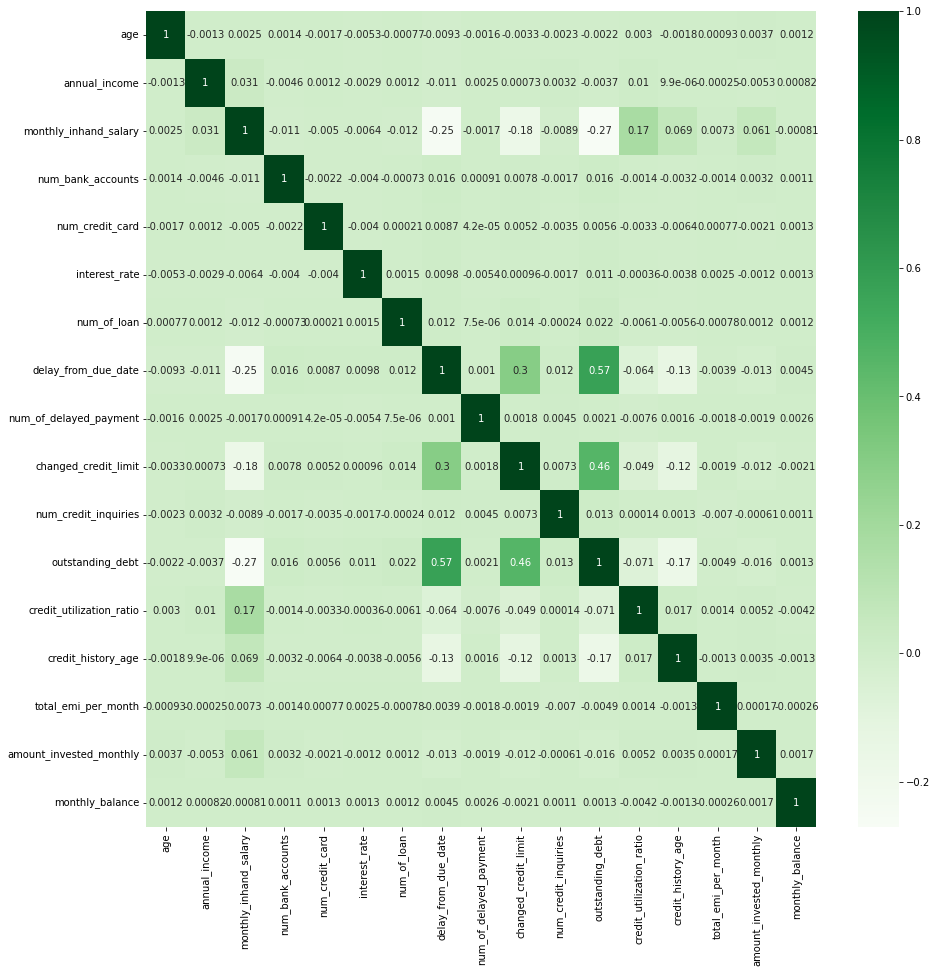

In [ ]:
_=plt.figure(figsize=(15,15))
sns.heatmap(train.select_dtypes(exclude='object').corr(),cmap='Greens',annot=True);

#### The above plot explain that there is a positive correlation between the outstanding dept. and delay from due date, changed credit limit.